In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from numpy import nan,inf
import scipy.constants as sc
import matplotlib as mpl
import glob
from astropy.time import Time

import matplotlib
plt.rc('font',**{'family':'serif','serif':['Times']})
mpl.rcParams['font.size'] = 13
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['patch.linewidth'] = 1

# Changing this will affect the size of the plot in Jupyter notebook as well as resolution of the final PDF. Can change later
plt.rcParams['figure.dpi'] = 100

#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Serif'
#mpl.rcParams['mathtext.it'] = 'Serif:italic'
#mpl.rcParams['mathtext.bf'] = 'Serif:bold'

# tick parameters:
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
    
mpl.rcParams['xtick.major.size'] = 6  # default 3.5
mpl.rcParams['ytick.major.size'] = 6  # default 3.5
mpl.rcParams['xtick.minor.size'] =  3  # default 2 
mpl.rcParams['ytick.minor.size'] = 3  # default 2 
    
mpl.rcParams['xtick.major.width'] = 1  # default 0.8
mpl.rcParams['ytick.major.width'] = 1  # default 0.8
mpl.rcParams['xtick.minor.width'] =1  # default 0.6
mpl.rcParams['ytick.minor.width'] = 1  # default 0.6
mpl.rcParams['text.usetex'] = True


MASS_TO_FREQ = sc.eV / sc.h
def plot_timescales( ax,ymin,ymax,annotate=True):

    l10ma_T = np.log10( 1/(1.0*sc.day*1 * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 day",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")
    
    # l10ma_T = np.log10( 1/(1.0*sc.day*14 * MASS_TO_FREQ) )
    # ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    # if annotate==True:
    #     ax.annotate(r"2 weeks",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(1.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"1 year",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(11.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T ,l10ma_T ],[ymin,ymax],'gray',ls=":")
    if annotate==True:
        ax.annotate(r"Solar Cycle",xy = [l10ma_T ,ymax],va = "top",rotation=-90,color="dimgray")

    l10ma_T = np.log10( 1/(18.0*sc.year * MASS_TO_FREQ) )
    ax.plot([l10ma_T,l10ma_T],[ymin,ymax],'gray',ls="-")
    if annotate==True:
        ax.annotate(r"T$_{\rm obs}$",xy = [l10ma_T,ymax],va = "top",rotation=-90,color="dimgray")


#rho = 7.68351e-6 * 0.40 #0.46
rho = (0.4 * 1e9 * 100**3) * sc.c**3  * sc.hbar**3 / sc.eV**3
l10S_to_l10ga = lambda l10S,l10ma: l10S+9+l10ma-np.log10(rho)/2


def make_ul_plot(ax,l10ma , ul_auto,ul_full ):
    #fig , ax = plt.subplots(figsize=(5,4))
    #ax.set_title("95% UL (Bayesian approach)")
    #ax.fill_between(np.log10(PPTA_QUIJOTE[:,0]),np.log10(PPTA_QUIJOTE[:,1]),np.zeros(len(PPTA_QUIJOTE)),alpha=0.5,fc='darkgreen',label="PPTA-QUIJOTE")


    _l10ma = np.linspace(-24,-18.5,101)
    #Chandra
    ax.plot(_l10ma,np.log10(5e-13)*np.ones(len(_l10ma)),color="black",ls='--')
    ax.annotate("Chandra\n H1821+643",xy=(-18.5-0.05,np.log10(5e-13)-0.1),size=12,va="top",ha="right")

    #Planck
    ax.plot(_l10ma,_l10ma+9,color="black",ls=':',lw=2)
    ax.annotate("Planck",xy=(-19.3,-10.5),size=14,va="top",ha="right",rotation="25")


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'.',color='blue')
        ax.plot(l10ma ,l10S_to_l10ga(ul_full,l10ma),'-',color='blue',label="Full-corr")
    except:
        pass


    try:
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'.',color='red')
        ax.plot(l10ma ,l10S_to_l10ga(ul_auto,l10ma),'-',color='red',label="Auto-corr")
    except:
        pass



    ax.set_xlim(-23.5,-18.5)
    ymin = -16
    ymax = -6
    ax.set_ylim(ymin,ymax)
    #plt.title(r"the 95% upper limit on $\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$"+
    #          "\n assuming local DM density " + r"$0.40 {\rm GeV}/{\rm cm}^3$")

    ax.legend(loc=4,prop={'size': 10})

    plot_timescales( ax,ymin,ymax,annotate=True)


    #ax.plot(mock[:,0] , l10S_to_l10ga(mock[:,2],mock[:,0]),'red' )

    #plot_timescales(ax,ymin,ymax)

    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    ax.set_ylabel(r"$\log_{\rm 10}g_{a\gamma\gamma}/{\rm GeV}^{-1}$")
    ax.grid(axis="y")


def make_bf_plot(ax,l10ma,lbf_af,lbf_nf):

    #fig , ax = plt.subplots(figsize=(5,3))
    ymin = -10
    ymax = 12
    plot_timescales( ax,ymin,ymax,annotate=False)

    try:
        ax.plot(l10ma,lbf_nf,'-',color='b',label="Full vs None")
        ax.plot(l10ma,lbf_nf,'.',color='b')
    except:
        pass

    try:
        ax.plot(l10ma,lbf_af,'-',color='r',label="Full vs Auto")
        ax.plot(l10ma,lbf_af,'.',color='r')
    except:
        pass
    
    
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(-23.5,-18.5)
    ax.plot([-23.5,-18.5],[0,0],lw=2,color="black")


    ax.set_xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
    #ax.set_ylabel(r"$\ln $BF$^{\rm full}_{\rm auto}$")
    ax.set_ylabel(r"$\ln $BF")
    ax.grid(axis="y")
    ax.legend(loc=4,prop={'size': 10})

# UL and BF, no iono

## 10cm

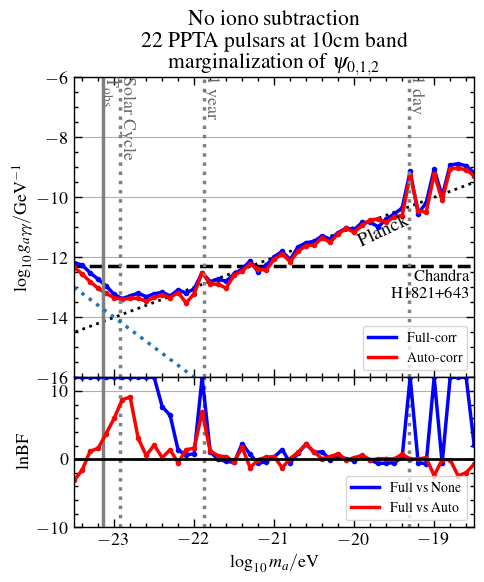

In [2]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)

l10ma = np.arange(5,56)*0.1 -24
ul_auto_10 = np.array([-0.59 , -0.913, -1.27 , -1.589, -1.859, -2.101, -2.249, -2.321,
       -2.421, -2.62 , -2.592, -2.619, -2.795, -2.732, -3.177, -2.967,
       -2.364, -2.841, -2.954, -3.181, -2.845, -2.814, -2.671, -2.948,
       -3.084, -2.815, -2.752, -3.098, -2.849, -2.764, -2.846, -2.703,
       -2.956, -2.772, -2.694, -2.918, -2.792, -2.713, -2.772, -2.993,
       -2.901, -2.964, -1.711, -3.005, -3.157, -1.977, -2.952, -2.002,
       -2.078, -2.245, -2.533])

ul_full_10 = np.array([ -0.428, -0.617, -0.969, -1.287, -1.608,
       -1.991, -2.23 , -2.24 , -2.249, -2.47 , -2.473, -2.52 , -2.743,
       -2.64 , -2.846, -2.807, -2.364, -2.765, -2.786, -2.952, -2.81 ,
       -2.742, -2.573, -3.047, -2.919, -2.739, -2.655, -3.032, -2.705,
       -2.668, -2.725, -2.638, -2.85 , -2.734, -2.682, -2.832, -2.694,
       -2.786, -3.038, -2.889, -2.809, -2.713, -1.594, -3.097, -2.841,
       -1.816, -2.818, -1.877, -1.936, -2.105, -2.441])

make_ul_plot(axes[0],l10ma,ul_auto_10,ul_full_10)
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
axes[0].set_title("No iono subtraction\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")
#plt.savefig("ul_10.pdf",bbox_inches='tight')

lbf_10 = np.array([  -inf,   -inf,  1.171,  3.42 ,  4.634,  5.362,    inf,    inf,
        2.749,  0.55 ,  2.144,  0.233,  1.37 , -0.524,  1.399,  1.594,
        6.921,  1.196,  0.489,  0.352, -0.357,  1.713, -1.255, -0.072,
        0.293,  0.381, -1.262,  0.086,  1.027,  2.241,  1.056,  0.048,
        0.369,  0.801, -0.114,  0.217,  0.569, -0.093,  0.036,  0.084,
        0.032,  0.702,  0.041,  0.019,  0.228, -2.422, -0.058, -0.093,
       -2.445, -1.976, -0.723])

idx = np.array([8,9,10,11,12,13,15])-5
lbf_10[idx] = np.array([-1.404,  0.759,  2.994,  5.077,  5.695,  0.062, -0.933])+3
idx = np.array([10,11,12])-5
lbf_10[idx] = np.array([-1.012,  1.716,  2.117])+7
lbf_10[1] = np.log(4.09)-3
lbf_10[0] = np.log(0.88)-3


lbf_nf_10 = np.array([   12,    12,    12,    12,    12,    12,    12,    12,
          12,    12,    12,  7.718,  6.413,  1.315,  0.632,  0.792,
          12,  1.101, -0.041, -0.315, -0.474,  2.265,  0.7  , -0.625,
       -0.345,  0.305,  1.41 , -0.555,  0.854,  2.223,  0.989,  1.082,
       -0.087,  0.537,  0.032, -0.237,  0.249, -0.145, -0.619, -0.583,
       -0.527,  0.272,    12, -0.52 , -0.653,    12, -0.61 ,    12,
          12,    12,  2.107])
make_bf_plot(axes[1],l10ma,lbf_10,lbf_nf_10)

plt.savefig("Figures/ul_bf_10.pdf")
plt.savefig("Figures/ul_bf_10.jpg")

# # Mock
# l10ma = np.arange(5,56)*0.1 -24
# ul_auto = np.array([-2.476, -2.803, -2.992, -3.209, -3.433, -3.493, -3.443, -3.388,
#        -3.549, -3.487, -3.462, -3.118, -3.391, -3.412, -3.347, -3.244,
#        -3.386, -3.331, -3.34 , -3.179, -3.361, -3.25 , -3.396, -3.191,
#        -3.332, -3.273, -3.19 , -3.327, -3.288, -3.09 , -3.205, -3.248,
#        -3.165, -3.215, -3.188, -2.948, -3.21 , -3.199, -2.881, -3.094,
#        -3.225, -3.211, -3.133, -2.973, -3.167, -3.239, -2.95 , -3.224,
#        -3.23 , -2.897, -3.095])

# ul_full = np.array([-2.392, -2.608, -2.972, -3.127, -3.324, -3.473, -3.569, -3.442,
#        -3.365, -3.562, -3.547, -3.304, -3.388, -3.41 , -3.268, -3.188,
#        -3.394, -3.028, -3.22 , -3.176, -3.411, -3.306, -3.288, -2.995,
#        -3.271, -3.373, -3.247, -3.256, -3.148, -3.094, -3.089, -3.252,
#        -3.019, -3.2  , -3.053, -3.019, -3.096, -3.147, -3.033, -2.637,
#        -3.057, -2.931, -3.327, -2.862, -3.241, -3.18 , -3.255, -2.996,
#        -2.73 , -3.316, -3.268])

# make_ul_plot(l10ma,ul_auto,ul_full)

# plt.plot(l10ma , -14-2*(l10ma+23.5))

# plt.title("white mock data\n"+r"marginalization of $\psi_{0,1,2}$")
# plt.savefig("ul_1_white.pdf",bbox_inches='tight')

## 20cm

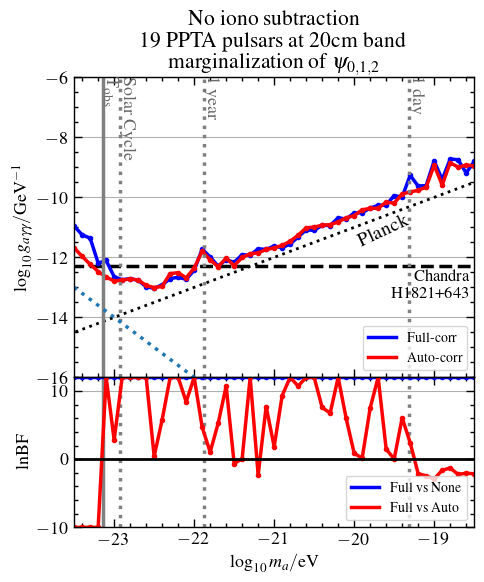

In [3]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto_20 = np.array([ 0.06 , -0.324, -0.689, -1.028, -1.317, -1.543, -1.615, -1.675,
       -1.808, -2.093, -2.264, -2.323, -1.996, -2.067, -2.339, -2.112,
       -1.649, -2.039, -2.369, -2.181, -2.532, -2.361, -2.335, -2.409,
       -2.391, -2.442, -2.457, -2.42 , -2.318, -2.173, -2.247, -2.286,
       -2.366, -2.377, -2.337, -2.366, -2.274, -2.322, -2.419, -2.317,
       -2.449, -2.245, -2.274, -2.324, -2.314, -1.684, -2.445, -1.803,
       -2.05 , -2.079, -2.206])

ul_full_20 = np.array([ 0.788,  0.393,  0.185, -0.748, -0.761,
       -1.404, -1.601, -1.666, -1.822, -2.132, -2.29 , -2.271, -2.166,
       -2.22 , -2.387, -2.189, -1.581, -1.946, -2.351, -2.23 , -2.424,
       -2.266, -2.388, -2.271, -2.394, -2.377, -2.534, -2.511, -2.374,
       -2.24 , -2.357, -2.287, -2.396, -2.238, -2.379, -2.279, -2.368,
       -2.313, -2.326, -2.412, -2.198, -2.345, -1.721, -2.18 , -2.264,
       -1.538, -2.265, -1.677, -1.803, -2.346, -2.06 ])

make_ul_plot(axes[0],l10ma,ul_auto_20,ul_full_20)
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
axes[0].set_title("No iono subtraction\n 19 PPTA pulsars at 20cm band\n"+r"marginalization of $\psi_{0,1,2}$")

lbf_20 = np.array([  -10,   -10,   -10,   -10,    12,  2.812,    12,    12,
          12,    12,  0.407,  5.791,    12,    12,  8.411,    12,
        4.677,  1.044,  5.258, 10.714, -0.638,  0.066,    12, -2.314,
        7.718,  1.824,  9.328,    12, 10.714,    12,    12,  7.578,
        6.762,    12,  5.993,  0.862,  0.147,  7.495,    12,  1.482,
        0.013,  6.058,  2.421, -2.122, -2.444, -2.907, -1.626, -1.295,
       -2.24 , -2.053, -2.148])
lbf_nf_20 = lbf_20/lbf_20*12

make_bf_plot(axes[1],l10ma,lbf_20,lbf_nf_20)
plt.savefig("Figures/ul_bf_20.pdf")
plt.savefig("Figures/ul_bf_20.jpg")


## 10+20 cm

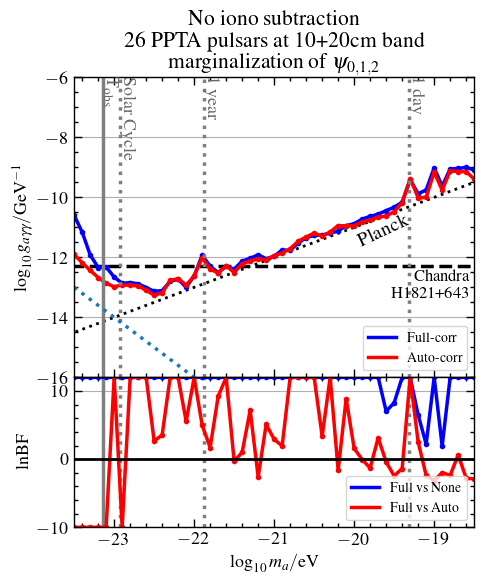

In [4]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto = np.array([-0.16 , -0.534, -0.89 , -1.23 , -1.518, -1.737, -1.77 , -1.889,
       -2.008, -2.257, -2.517, -2.544, -2.226, -2.265, -2.581, -2.376,
       -1.869, -2.354, -2.576, -2.436, -2.764, -2.573, -2.578, -2.609,
       -2.736, -2.699, -2.716, -2.669, -2.519, -2.478, -2.447, -2.651,
       -2.609, -2.497, -2.607, -2.7  , -2.68 , -2.716, -2.719, -2.779,
       -2.733, -2.538, -1.83 , -2.572, -2.654, -1.917, -2.614, -2.073,
       -2.195, -2.298, -2.648])

ul_full = np.array([ 1.145,  0.486, -0.373, -0.895, -0.981, -1.412, -1.725, -1.796,
       -1.938, -2.162, -2.387, -2.465, -2.256, -2.287, -2.653, -2.376,
       -1.786, -2.251, -2.563, -2.456, -2.652, -2.482, -2.489, -2.469,
       -2.704, -2.72 , -2.612, -2.721, -2.579, -2.5  , -2.524, -2.613,
       -2.645, -2.684, -2.596, -2.637, -2.582, -2.588, -2.619, -2.597,
       -2.588, -2.516, -1.866, -2.435, -2.41 , -1.773, -2.483, -2.01 ,
       -2.09 , -2.158, -2.345])

make_ul_plot(axes[0],l10ma,ul_auto,ul_full)
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')
axes[0].set_title("No iono subtraction\n 26 PPTA pulsars at 10+20cm band\n"+r"marginalization of $\psi_{0,1,2}$")

lbf = np.array([  -10,   -10,   -10,   -10,   -10,    12 ,   -10,    12 ,
          12 ,    12 ,  2.655,  3.555,    12 ,    12 ,  5.532,    12 ,
        4.987,  1.706,  9.209,    12, -0.301,  1.003,  7.185, -2.615,
        5.099,  2.915,  1.943,    12 ,    12 ,    12 ,    12 ,  3.354,
       12 , -1.632,  8.889,  1.576, -0.054, -1.305,  3.14 , -0.414,
       -2.455, -1.369,    12 ,  2.502, -2.378, -3.165, -1.964, -2.385,
        0.615, -2.762, -2.915])
lbf_nf = np.array([  inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf, 7.027, 8.276,   inf,   inf, 6.486, 2.208,
         inf, 1.923,   inf,   inf,   inf,   inf])
lbf_nf[lbf_nf==np.inf]=12

make_bf_plot(axes[1],l10ma,lbf,lbf_nf)
plt.savefig("Figures/ul_bf_all.pdf")
plt.savefig("Figures/ul_bf_all.jpg")


# UL and BF, after subtraction

## 10cm

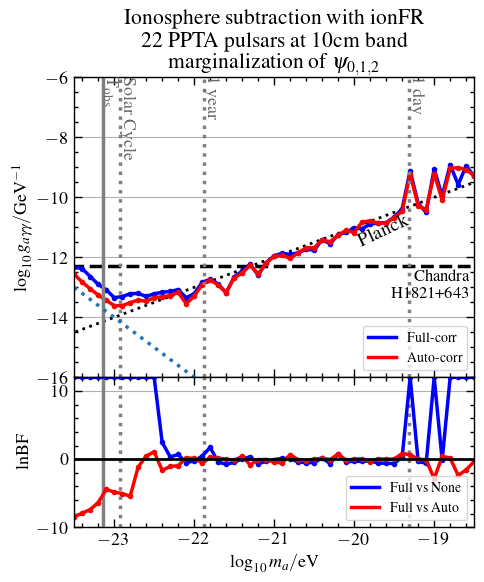

In [5]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto_ion_10 = np.array([-0.82 , -1.18 , -1.503, -1.813, -2.086, -2.365, -2.47 , -2.464,
       -2.48 , -2.625, -2.597, -2.672, -2.729, -2.727, -3.201, -3.055,
       -2.762, -2.714, -2.977, -3.331, -2.939, -2.883, -2.722, -3.109,
       -2.846, -2.724, -2.792, -2.991, -2.901, -2.837, -2.939, -2.773,
       -2.936, -2.818, -2.748, -2.936, -2.677, -2.742, -2.915, -3.013,
       -2.934, -2.817, -1.683, -2.834, -3.067, -1.962, -2.946, -1.99 ,
       -2.064, -2.237, -2.536])


ul_full_ion_10 = np.array([-0.585, -0.73 , -1.096, -1.453, -1.735, -2.097, -2.165, -2.167,
       -2.26 , -2.461, -2.471, -2.52 , -2.594, -2.63 , -3.003, -2.965,
       -2.688, -2.69 , -2.948, -3.335, -2.913, -2.812, -2.688, -3.148,
       -2.837, -2.701, -2.721, -2.859, -2.91 , -2.88 , -3.023, -2.762,
       -3.006, -2.797, -2.824, -2.778, -2.903, -2.848, -2.909, -2.998,
       -2.916, -2.734, -1.565, -2.764, -3.153, -1.816, -2.808, -1.871,
       -2.632, -2.103, -2.552])


make_ul_plot(axes[0],l10ma,ul_auto_ion_10,ul_full_ion_10)
axes[0].set_title("Ionosphere subtraction with ionFR\n 22 PPTA pulsars at 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')

lbf = np.array([  -inf, -6.907,   -inf, -5.912, -5.48 , -2.83 , -5.093, -6.332,
       -1.234,  0.45 ,  1.083, -1.633, -1.075, -0.967,  0.177,  0.126,
       -0.556,  0.258,  0.12 ,  0.016, -0.144,  0.418, -0.839, -0.077,
       -0.049, -0.437, -0.563,  0.68 , -0.101, -0.199, -0.01 ,  0.141,
       -0.057,  0.765, -0.165,  0.025,  0.029, -0.375,  0.055, -0.008,
        0.021,  0.826,  0.661, -0.015, -0.078, -2.888,  0.425,  0.159,
       -2.378, -1.566, -0.331])

lbf[[0,1,2]] = np.log([0.63,1.08,1.83])-8
lbf[[3,4,6,7]] = np.log([0.69,4.80,2.59,1.78])-6
lbf[[5]] = np.log([0.44])-4
lbf[[8]] = np.log([2.32])-2

lbf_nf = np.array([   12,    12,    12,    12,    12,    12,    12,    12,
          12,    12,    12,  2.469,  0.34 ,  0.686, -0.502, -0.261,
        0.44 ,  1.723, -0.433, -0.731, -0.478,  0.065,  0.331, -0.637,
       -0.34 , -0.078,  0.125,  0.078, -0.405, -0.527, -0.49 ,  0.152,
       -0.645,  0.736, -0.397, -0.304, -0.327, -0.274, -0.551, -0.607,
       -0.636,  0.338,    12, -0.332, -0.609,    12, -0.144,    12,
          12,    12,    12])

make_bf_plot(axes[1],l10ma,lbf,lbf_nf)
plt.savefig("Figures/ul_bf_iono_10.pdf")
plt.savefig("Figures/ul_bf_iono_10.jpg")


## 20cm

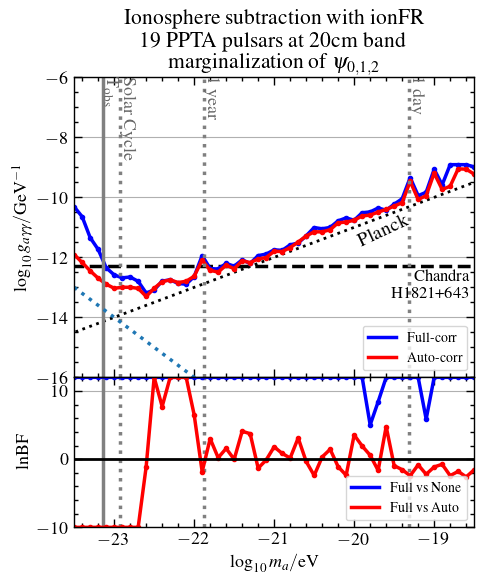

In [6]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto_ion_20 = np.array([-0.163, -0.527, -0.906, -1.251, -1.551, -1.786, -1.855, -1.953,
       -2.09 , -2.46 , -2.29 , -2.164, -2.207, -2.396, -2.453, -2.387,
       -1.945, -2.387, -2.55 , -2.413, -2.637, -2.471, -2.632, -2.609,
       -2.663, -2.554, -2.662, -2.632, -2.545, -2.447, -2.404, -2.507,
       -2.535, -2.404, -2.48 , -2.52 , -2.475, -2.548, -2.546, -2.559,
       -2.549, -2.532, -1.924, -2.627, -2.6  , -1.947, -2.594, -2.585,
       -2.105, -2.218, -2.481])


ul_full_ion_20 = np.array([ 1.43 ,  0.999,  0.201, -0.292, -1.001, -1.34 , -1.539, -1.612,
       -1.855, -2.346, -2.34 , -2.148, -2.205, -2.426, -2.551, -2.397,
       -1.798, -2.331, -2.446, -2.36 , -2.55 , -2.439, -2.659, -2.498,
       -2.548, -2.505, -2.624, -2.54 , -2.578, -2.44 , -2.263, -2.404,
       -2.458, -2.339, -2.341, -2.52 , -2.369, -2.442, -2.411, -2.586,
       -2.484, -2.404, -1.799, -2.499, -2.487, -1.82 , -2.438, -1.867,
       -1.966, -2.068, -2.238])


make_ul_plot(axes[0],l10ma,ul_auto_ion_20,ul_full_ion_20)
axes[0].set_title("Ionosphere subtraction with ionFR\n 19 PPTA pulsars at 20cm band\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')

lbf = np.array([  -10,   -10,   -10,   -10,   -10,   -10,   -10,   -10,
         -10, -1.106,    12,  7.718,    12,    12,    12,  6.508,
       -1.839,  3.007,  0.214,  1.567, -0.024,  4.088,  3.738, -1.323,
       -0.118,  1.807,  0.841,  0.164,  3.107, -0.342, -2.39 ,  0.321,
        1.446, -1.113, -2.356,  3.549,  1.926,  0.578, -1.654,  4.779,
       -0.951, -1.541, -2.43 , -0.838, -2.214, -1.141, -0.751, -2.415,
       -1.792, -2.604, -1.561])
lbf_nf = np.array([  inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf, 5.028, 8.426,   inf,   inf,   inf,   inf,   inf, 5.875,
         inf,   inf,   inf,   inf,   inf,   inf])
lbf_nf[ lbf_nf == np.inf] = 12



make_bf_plot(axes[1],l10ma,lbf,lbf_nf)
plt.savefig("Figures/ul_bf_iono_20.pdf")
plt.savefig("Figures/ul_bf_iono_20.jpg")


## 10+20 cm

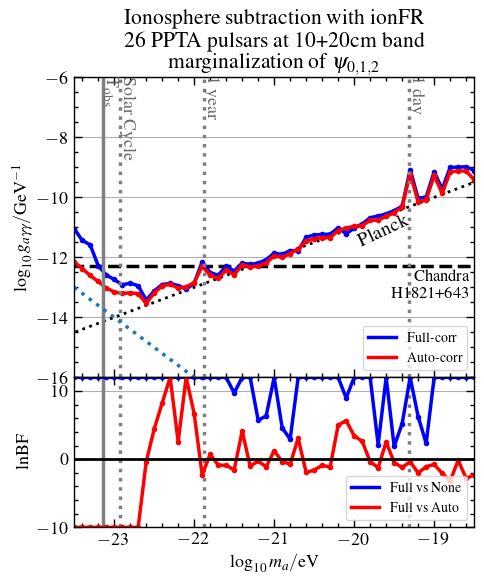

In [7]:
# True
fig,axes = plt.subplots(2,1,figsize=(5,6),sharex=True,gridspec_kw={'height_ratios': [4, 2]})
plt.subplots_adjust(left=0.15,
                    bottom=0.10, 
                    right=0.95, 
                    top=0.85, 
                    wspace=0.0, 
                    hspace=0.0)


l10ma = np.arange(5,56)*0.1 -24
ul_auto_ion_1020 = np.array([-0.406, -0.731, -1.061, -1.359, -1.671, -1.91 , -2.06 , -2.137,
       -2.267, -2.692, -2.447, -2.307, -2.351, -2.584, -2.638, -2.601,
       -2.155, -2.558, -2.761, -2.582, -2.836, -2.611, -2.768, -2.851,
       -2.851, -2.705, -2.858, -2.828, -2.769, -2.62 , -2.64 , -2.696,
       -2.797, -2.662, -2.678, -2.721, -2.796, -2.724, -2.815, -2.79 ,
       -2.772, -2.67 , -1.663, -2.707, -2.742, -2.025, -2.726, -2.106,
       -2.173, -2.282, -2.668])


ul_full_ion_1020 = np.array([ 0.702,  0.211, -0.037, -0.831, -1.244, -1.492, -1.771, -1.818,
       -2.002, -2.578, -2.38 , -2.263, -2.325, -2.499, -2.716, -2.618,
       -2.006, -2.464, -2.653, -2.451, -2.714, -2.55 , -2.69 , -2.75 ,
       -2.734, -2.617, -2.759, -2.73 , -2.844, -2.487, -2.512, -2.593,
       -2.685, -2.571, -2.869, -2.783, -2.744, -2.636, -2.678, -2.709,
       -2.697, -2.652, -1.531, -2.591, -2.646, -1.9  , -2.583, -1.956,
       -2.05 , -2.135, -2.363])


make_ul_plot(axes[0],l10ma,ul_auto_ion_1020,ul_full_ion_1020)
axes[0].set_title("Ionosphere subtraction with ionFR\n 26 PPTA pulsars at 10+20cm band\n"+r"marginalization of $\psi_{0,1,2}$")
axes[0].plot(l10ma , -13-2*(l10ma+23.5),':')


lbf = np.array([  -10,   -10,   -10,   -10,   -10,   -10,   -10,   -10,
         -10, -0.453,  4.415,  8.224,    12,  2.561,    12,  6.687,
       -2.287,  0.72 , -0.869, -0.896, -1.579,  4.113, -1.03 , -0.268,
       -1.121,  1.219, -0.352, -0.732,  3.069, -1.954, -1.599, -0.918,
       -1.154,  4.99 ,  5.652,  3.434,  2.624, -0.349, -1.263,  2.536,
       -0.494, -1.207, -0.38 , -2.019, -1.097, -0.767, -2.056, -3.201,
       -0.173, -2.812, -2.309])


lbf_nf=np.array([  inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,   inf,
         inf,   inf, 9.706,   inf,   inf, 5.712, 6.331,   inf, 4.599,
       2.932,   inf,   inf,   inf,   inf,   inf,   inf, 8.975,   inf,
         inf,   inf, 2.108,   inf, 1.876, 5.221,   inf, 6.243, 2.313,
         inf,   inf,   inf,   inf,   inf,   inf])
lbf_nf[lbf_nf==np.inf]=12

make_bf_plot(axes[1],l10ma,lbf,lbf_nf)
plt.savefig("Figures/ul_bf_iono_all.pdf")
plt.savefig("Figures/ul_bf_iono_all.jpg")


#  Other

In [17]:



# l10ma = np.arange(5,56)*0.1 -24
# ul_auto = np.array([-1.495, -1.716, -1.922, -2.031, -2.102, -2.106, -2.151, -2.289,
#        -2.366, -2.583, -2.579, -2.788, -2.786, -2.681, -3.282, -3.144,
#        -2.343, -2.917, -3.127, -3.143, -2.899, -2.872, -2.692, -2.862,
#        -2.998, -2.84 , -2.775, -2.737, -2.809, -2.598, -2.682, -2.673,
#        -2.766, -2.603, -2.692, -2.73 , -2.715, -2.71 , -2.849, -2.975,
#        -2.904, -2.717, -1.842, -3.006, -3.016, -1.946, -2.888, -1.981,
#        -2.066, -2.244, -3.2  ])

# ul_full = np.array([-0.895, -1.286, -1.407, -1.503, -1.756, -1.875, -2.026, -2.126,
#        -2.124, -2.421, -2.436, -2.84 , -2.773, -2.552, -2.947, -2.91 ,
#        -2.348, -2.913, -2.979, -2.852, -2.92 , -2.765, -2.627, -2.912,
#        -2.851, -2.793, -2.665, -2.771, -2.672, -2.598, -2.581, -2.63 ,
#        -2.653, -2.57 , -2.606, -2.751, -2.721, -2.779, -2.893, -2.947,
#        -2.617, -2.527, -1.692, -2.949, -3.016, -1.805, -3.059, -1.867,
#        -1.929, -2.105, -2.426])


# make_ul_plot(l10ma,ul_auto,ul_full)
# plt.title("real data\n"+r"marginalization of $\psi_{0,1}$")
# plt.savefig("ul_2.pdf",bbox_inches='tight')



# # Mock
# l10ma = np.arange(5,56)*0.1 -24
# ul_auto = np.array([-2.637, -2.786, -2.974, -3.097, -3.178, -3.198, -3.309, -3.393,
#        -3.495, -3.461, -3.445, -3.249, -3.403, -3.442, -3.225, -3.238,
#        -3.377, -3.388, -3.329, -3.171, -3.375, -3.33 , -3.359, -3.145,
#        -3.312, -3.263, -3.223, -3.259, -3.278, -3.278, -3.216, -3.272,
#        -3.229, -3.271, -3.193, -3.253, -3.126, -3.145, -3.06 , -2.956,
#        -2.862, -3.153, -3.163, -3.114, -3.199, -3.255, -3.227, -3.235,
#        -3.007, -2.963, -3.054])

# ul_full = np.array([-2.519, -2.757, -3.01 , -3.216, -3.26 , -3.459, -3.461, -3.41 ,
#        -3.335, -3.405, -3.409, -3.331, -3.362, -3.409, -3.219, -3.199,
#        -3.45 , -3.072, -3.254, -3.212, -3.402, -3.322, -3.357, -3.007,
#        -3.265, -3.328, -3.208, -3.383, -3.147, -2.958, -3.059, -3.243,
#        -3.047, -3.142, -3.091, -3.179, -3.138, -2.982, -3.073, -3.177,
#        -3.167, -2.961, -3.102, -2.974, -3.325, -3.356, -2.856, -3.225,
#        -2.965, -3.031, -3.156])

# make_ul_plot(l10ma,ul_auto,ul_full)
# plt.plot(l10ma , -14-1*(l10ma+23.5)-0.5)


# plt.title("white mock data\n"+r"marginalization of $\psi_{0,1}$")
# plt.savefig("ul_2_white.pdf",bbox_inches='tight')


In [19]:



# l10ma = np.arange(5,56)*0.1 -24
# ul_auto = np.array([-1.717, -1.847, -1.942, -2.014, -2.056, -2.098, -2.122, -2.213,
#        -2.311, -2.597, -2.594, -2.654, -2.762, -2.659, -3.218, -3.059,
#        -2.346, -2.735, -3.246, -2.9  , -2.816, -2.855, -2.603, -2.789,
#        -2.974, -2.742, -2.751, -2.82 , -2.662, -2.614, -2.612, -2.642,
#        -2.65 , -2.563, -2.714, -2.743, -2.723, -2.845, -2.726, -2.808,
#        -2.921, -2.603, -2.086, -2.786, -3.007, -1.98 , -2.838, -2.009,
#        -2.078, -2.238, -2.477])

# ul_full = np.array([-0.759, -0.795, -1.212, -1.457, -1.579, -1.752, -1.975, -2.014,
#        -2.036, -2.431, -2.445, -2.552, -2.688, -2.522, -2.917, -2.944,
#        -2.341, -2.735, -3.17 , -2.803, -2.804, -2.753, -2.494, -2.725,
#        -2.802, -2.643, -2.664, -2.81 , -2.642, -2.612, -2.53 , -2.622,
#        -2.59 , -2.5  , -2.708, -2.673, -2.671, -2.792, -2.82 , -2.748,
#        -2.73 , -2.495, -1.951, -2.769, -3.03 , -1.836, -2.951, -1.883,
#        -1.946, -2.108, -2.368])


# make_ul_plot(l10ma,ul_auto,ul_full)
# plt.title("real data\n"+r"marginalization of $\psi_{0}$")
# plt.savefig("ul_3.pdf",bbox_inches='tight')

# #make_bf_plot(l10ma,np.log(bf))


# # Mock
# l10ma = np.arange(5,56)*0.1 -24
# ul_auto = np.array([-3.044, -3.047, -3.064, -3.09 , -3.106, -3.253, -3.35 , -3.435,
#        -3.548, -3.469, -3.475, -3.298, -3.447, -3.457, -3.248, -3.288,
#        -3.395, -3.31 , -3.294, -3.16 , -3.352, -3.433, -3.348, -3.236,
#        -3.297, -3.298, -3.262, -3.3  , -3.389, -3.33 , -3.094, -3.26 ,
#        -3.086, -3.273, -3.18 , -2.989, -3.2  , -3.087, -3.175, -2.764,
#        -2.851, -3.209, -2.993, -2.975, -3.217, -3.084, -3.041, -3.201,
#        -3.251, -3.306, -3.183])

# ul_full = np.array([-3.098, -3.164, -3.196, -3.31 , -3.315, -3.436, -3.524, -3.506,
#        -3.397, -3.445, -3.405, -3.39 , -3.372, -3.449, -3.11 , -3.121,
#        -3.429, -3.034, -3.238, -3.137, -3.373, -3.384, -3.433, -2.945,
#        -3.256, -3.3  , -3.235, -3.26 , -3.082, -3.259, -3.14 , -3.29 ,
#        -2.958, -3.265, -3.15 , -3.028, -3.144, -3.2  , -2.851, -2.739,
#        -3.203, -3.167, -3.204, -3.107, -3.082, -3.009, -3.214, -3.083,
#        -3.232, -3.295, -3.08 ])

# make_ul_plot(l10ma,ul_auto,ul_full)
# plt.plot(l10ma , -14-0*(l10ma+23.5)-1)

# plt.title("white mock data\n"+r"marginalization of $\psi_{0}$")
# plt.savefig("ul_3_white.pdf",bbox_inches='tight')



# Some Mock Data Analysis

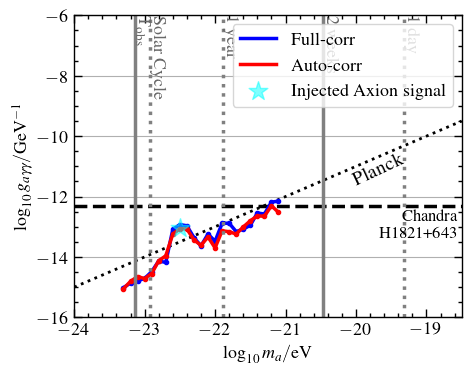

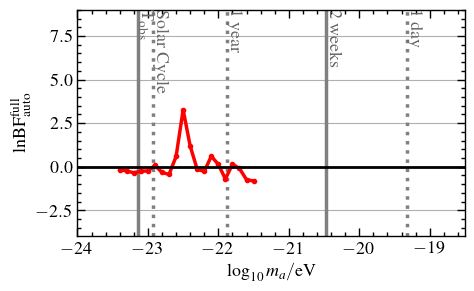

In [ ]:
l10ma = np.arange(0,56)*0.1 -24
l10ma = l10ma[7:30]
ul_auto = np.array([-3.715, -3.725, -3.647, -3.744, -3.639, -3.675, -3.477, -3.509,
       -3.365, -3.305, -3.472, -3.408, -3.081, -3.019, -2.397, -2.322,
       -2.43 , -2.89 , -3.17 , -2.994, -3.456, -2.989, -3.121, -3.297,
       -3.164, -3.06 , -2.997, -3.108, -2.86 , -3.181, -3.129, -3.1  ,
       -2.946, -2.923, -2.849, -3.029, -2.916, -2.729, -3.045, -3.23 ,
       -3.152, -3.203, -3.155, -3.272, -2.99 , -2.998, -2.931, -2.448,
       -2.915, -3.082, -3.21 , -3.081, -2.978, -2.935, -3.114, -2.752])
ul_auto = ul_auto[7:30]

ul_full = np.array([-4.429, -3.463, -2.069, -3.369, -3.02 , -5.37 , -6.571, -3.472,
       -3.421, -3.446, -3.469, -3.343, -3.091, -3.237, -2.245, -2.183,
       -2.324, -2.814, -3.191, -2.896, -3.236, -2.741, -2.84 , -3.217,
       -3.234, -3.209, -2.899, -3.035, -2.739, -2.809, -2.536, -2.683,
       -2.79 , -2.828, -2.622, -2.944, -2.969, -3.01 , -2.43 , -2.471,
       -2.879, -3.208, -2.956, -3.089, -2.691, -3.176, -3.13 , -2.33 ,
       -2.978, -2.597, -3.24 , -2.667, -2.935, -3.203, -3.039, -3.172])
ul_full = ul_full[7:30]


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-22.5,l10S_to_l10ga(-2.3,-22.5),s=200,marker="*",color="cyan",zorder=4,alpha=0.5,label="Injected Axion signal")
plt.legend()


l10ma = -24.00 + np.arange(6,26)*0.1
lbf = [-0.1688208695750521, -0.2497105786989314, -0.3508066955703004, -0.26104686519913717, -0.2446918875204126, 0.06959329179919539, -0.3298399352280354, -0.4455238686601693, 0.5837746234121585, 3.2685314153140625, 1.1814999484738775, -0.1585732078723831, -0.2667886248635035, 0.5999819379959375, 0.12489327383888797, -0.7047080029610214, 0.137852298094139, -0.10444266336759751, -0.7527941896286593, -0.8167611365271221]
make_bf_plot(l10ma,lbf)

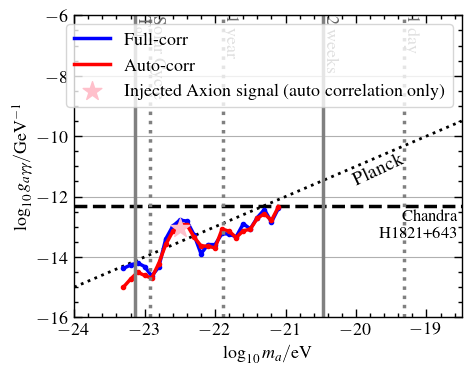

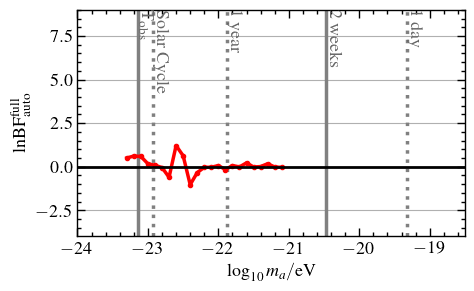

In [ ]:

l10ma = -24.00 + np.arange(7,30)*0.1
ul_auto = np.array([-3.453, -3.292, -3.163, -3.368, -3.558, -3.175, -2.643, -2.31 ,
       -2.179, -2.287, -2.791, -3.189, -3.3  , -3.457, -2.931, -3.106,
       -3.414, -3.291, -3.336, -3.074, -3.027, -3.347, -2.994])

ul_full = np.array([-2.833, -2.823, -2.853, -3.073, -3.486, -3.297, -2.46 , -2.135,
       -2.037, -2.169, -2.715, -3.448, -3.247, -3.348, -3.077, -3.204,
       -3.389, -3.057, -3.326, -3.05 , -2.888, -3.403, -3.043])

lbf = np.array([ 0.497,  0.61 ,  0.585,  0.166,  0.077, -0.049, -0.611,  1.208,
        0.628, -1.033, -0.342, -0.038, -0.033,  0.063, -0.166,  0.065,
       -0.015,  0.22 , -0.022,  0.006,  0.169, -0.021, -0.038])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-22.5,l10S_to_l10ga(-2.3,-22.5),s=200,marker="*",color="pink",zorder=4,alpha=1,label="Injected Axion signal (auto correlation only)")
plt.legend()


make_bf_plot(l10ma,lbf)

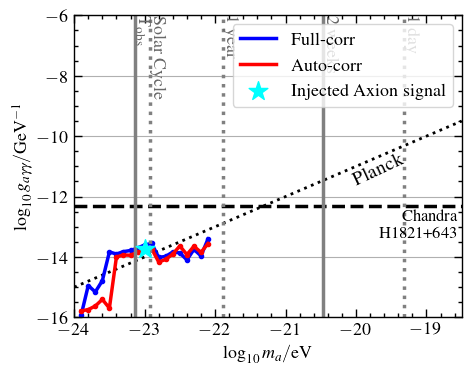

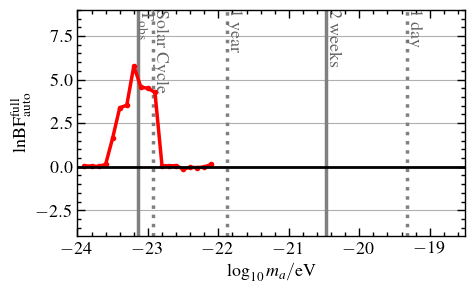

In [ ]:

l10ma = -24.00 + np.arange(1,20)*0.1
ul_auto = np.array([-3.644, -3.699, -3.681, -3.563, -3.95 , -2.356, -2.39 , -2.5  ,
       -2.503, -2.525, -2.586, -3.123, -3.138, -3.059, -2.894, -3.278,
       -3.104, -3.402, -3.216])

ul_full = np.array([-3.775, -2.902, -3.216, -2.942, -2.091, -2.259, -2.28 , -2.342,
       -2.363, -2.357, -2.41 , -2.972, -3.038, -2.991, -3.123, -3.454,
       -3.207, -3.521, -3.059])

lbf = np.array([ 0.04 ,  0.036,  0.012,  0.132,  1.651,  3.381,  3.526,  5.779,
        4.567,  4.498,  4.26 ,  0.056,  0.048,  0.059, -0.134, -0.041,
       -0.055, -0.017,  0.129])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="cyan",zorder=4,alpha=1,label="Injected Axion signal")
plt.legend()


make_bf_plot(l10ma,lbf)

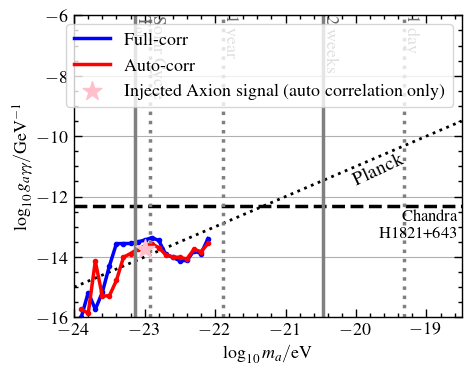

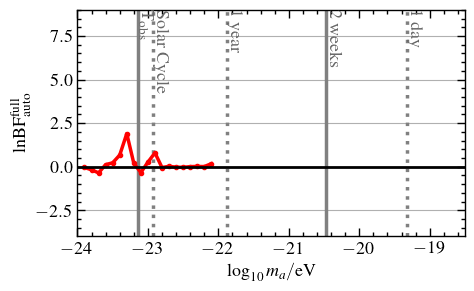

In [ ]:

l10ma = -24.00 + np.arange(1,20)*0.1
ul_auto = np.array([-3.596, -3.814, -2.196, -3.449, -3.542, -3.133, -2.465, -2.443,
       -2.398, -2.401, -2.421, -2.646, -2.983, -3.157, -3.271, -3.423,
       -3.203, -3.382, -3.21 ])

ul_full = np.array([-3.861, -3.134, -3.791, -3.329, -2.553, -1.916, -2.012, -2.11 ,
       -2.159, -2.199, -2.218, -2.408, -2.971, -3.17 , -3.382, -3.473,
       -3.254, -3.445, -3.05 ])

lbf = np.array([-4.572e-02, -1.837e-01, -3.565e-01,  1.168e-01,  2.207e-01,
        6.665e-01,  1.895e+00,  1.904e-01, -3.369e-01,  2.570e-01,
        7.936e-01, -5.020e-02,  2.153e-02, -2.898e-02, -3.803e-02,
        1.201e-03,  1.377e-02,  3.922e-03,  1.698e-01])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-23,l10S_to_l10ga(-2.5,-23),s=200,marker="*",color="pink",zorder=4,alpha=1,label="Injected Axion signal (auto correlation only)")
plt.legend()


make_bf_plot(l10ma,lbf)

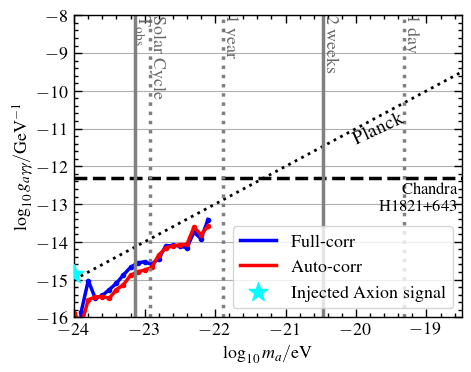

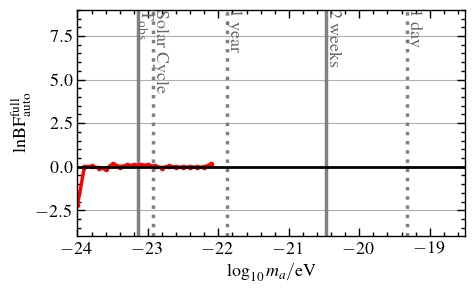

In [ ]:

l10ma = -24.00 + np.arange(0,20)*0.1
ul_auto = np.array([-3.636, -4.058, -3.494, -3.514, -3.605, -3.748, -3.624, -3.588,
       -3.443, -3.451, -3.504, -3.532, -3.308, -3.221, -3.265, -3.333,
       -3.426, -3.067, -3.366, -3.239])

ul_full = np.array([-6.53 , -3.71 , -2.981, -3.553, -3.577, -3.519, -3.453, -3.33 ,
       -3.232, -3.214, -3.283, -3.451, -3.398, -3.166, -3.252, -3.364,
       -3.516, -3.195, -3.474, -3.065])


lbf = np.array([-2.197,  0.   ,  0.015, -0.061, -0.15 ,  0.154,  0.005,  0.067,
        0.086,  0.082,  0.1  ,  0.012, -0.053,  0.018, -0.025, -0.029,
       -0.017, -0.031, -0.026,  0.151])


make_ul_plot(l10ma,ul_auto,ul_full)
plt.scatter(-24,l10S_to_l10ga(-2.6,-24),s=200,marker="*",color="cyan",zorder=4,alpha=1,label="Injected Axion signal")
plt.legend()

make_bf_plot(l10ma,lbf)

In [ ]:
"""
import glob
import numpy as np
def getbf(burn = 0 , printit=True , folder="./"):
   files = sorted(glob.glob(folder+'*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/chain_1.0.txt"))[::-1]\
      + sorted(glob.glob(folder+'*/*/chain_1.txt'))[::-1] + sorted(glob.glob(folder+"*/*/chain_1.0.txt"))[::-1]
   res = []
   ys = []
   #l10ma = []
   np.set_printoptions(precision=3)
   for file in files:
      try:
         chain = np.loadtxt(file,skiprows=burn)
         chain0 = chain[chain[:,0]<0]
         chain1 = chain[chain[:,0]>=0]

         if len(chain1) ==0 :
            ul1 = np.repeat(np.nan,5)
         else:
            ul1 = np.percentile(chain1[:,-5],[5,32,50,68,95])

         if len(chain0) ==0 :
            ul0 = np.repeat(np.nan,5)
         else:
            ul0 = np.percentile(chain0[:,-5],[5,32,50,68,95])

         try:
            bestfit = chain[np.argmax(chain[:,-4]),[-7,-6,-5]]
         except:
            bestfit=""

         try:
            dlnpos = chain[-1,-4].max()
         except:
            dlnpos = np.nan

         y = len(chain1)/len(chain)
         ys.append(y)
         res.append([ul0.tolist(),ul1.tolist()])
         if printit == True:
            print(file.split("/")[:-1],"|",np.histogram(chain[:,0],bins=[-1,0,1])[0],
            "|%.2f"%(ul0[-1]),"%.2f"%(ul1[-1]),"|%.2f"%(y/(1-y+1e-9)),"|%.2f"%dlnpos,"|",bestfit)
         #l10ma.append(float(file.split("/")[0].split("_")[-1]))

      except:
         if printit==True:
            print(file.split("/")[:-1],"|")
   ys = np.array(ys)
   lbf = np.log(ys/(1-ys));lbf = lbf.tolist()
   return res,lbf
"""


In [23]:
# _res0 = np.array([-0.029625455951990662, -0.2551855768244521, -0.47875513287849036, -0.7179730442003277, -0.9877018183944619, -1.211267683581839, -1.459230008171994, -1.5961520058852077, -1.6531086555063534, -1.8749476050726377, -2.3608522864785852, -2.2935339184756005, -2.5674387462449393, -2.5161802048719597, -2.2882386782231903, -2.4807705317517272, -2.419951724641604, -2.4972457276597084, -2.4625366001342632, -2.1500419753126168, -2.2883197240884052, -2.012133154479748, -2.039753779377, -2.4070876408259076, -2.157616219737376, -2.380159270967485, -2.2890157852985764, -2.302839328273847, -2.1399772546500326, -1.8601908687837714, -2.2261882233829273, -1.962858109223416, -1.7652273992873715, -2.0617615201953914, -2.1213423130825544, -1.7698908804655622, -2.077162269650103, -2.226841271311093, -2.1252238481021126, -1.9926711025225874, -2.1921789478345266, -2.038505643618071, -1.8760603684089459, -1.9558021462715718, -2.0812556378362723, -1.3292430931893684, -2.0725358320395144, -1.175135638477821, -1.3695059032689478, -2.0981642702894145, -2.014594463934371, 0.6696165872609864, 0.2625863515474858, -0.1612183237509805, -0.5226243532321578, -0.8931224254052788, -1.1568532002766059, -1.4023404954085028, -1.8138950609821503, -2.7109290455540767, -2.518819916472035, -2.2371906821230625, -2.609586830467043, -2.3861602859186086, -2.6342662373661376, -2.4783748635971885, -2.395152286353726, -2.2878541197264086, -2.5869979218317973, -2.5045744074420013, -2.5299580238165262, -2.1866570634544717, -2.505814814586025, -2.0600190140882377, -2.4158795005189777, -2.2369481209091027, -2.206975792501731, -2.203160110661522, -2.205745155107498, -2.2145571173345404, -2.1793273989407274, -2.1048832437465776, -2.0585779228878254, -2.3038672062219687, -2.258905932515683, -2.1477212805227355, -2.348022346714719, -2.297703715115122, -2.2933442025934325, -2.3119269598794476, -2.221873262869519, -2.2144559250175293, -2.11235996360105, -0.6959653674538314, -2.274249241444189, -2.240750234404727, -0.9732014972272048, -2.244194740959712, -1.0597927423346192, -1.1567964912614352, -1.2813673063379467, -2.1982328195605043, -0.7072995605575382, -1.0400376703029257, -1.3616987689465074, -1.7104782359474555, -2.0583371824010857, -2.3980037104569383, -2.6709292231799773, -2.1939912240969113, -1.6896085452006786, -2.047920289398004, -2.6335236938902087, -2.7426418271730273, -2.2888674105868683, -2.1167183752489676, -2.235259363693967, -2.6242893371344373, -1.7580843548144311, -2.0522066108354746, -2.4105981387772837, -2.3564247140088903, -2.483790963634925, -2.4730770373514606, -2.6457818172691185, -2.2565776282213674, -2.597730766764006, -2.048414533486642, -2.4834670069812397, -2.468842144226081, -2.1341470994045895, -2.364883216625762, -2.318103930051773, -2.4178250015929237, -2.4551116727271665, -2.0957867075460843, -2.4463043997292853, -2.33014904530471, -2.342279685446739, -2.240365960709791, -2.146258438484798, -2.413761460882189, -2.2849078206749924, -2.324995341219322, -2.252394002774896, -2.2308462129104996, -2.2795732564407714, -2.2859971145654714, -2.166867426185648, -2.2889001365724817, -2.2479369481169904, -2.1525653343481745, -2.171897639535399, 0.3433137638350208, -0.08644186610416933, -0.4695151526647192, -0.8698574323915989, -1.1879975028310539, -1.4779333605665126, -1.660974855002987, -1.8037262193606882, -1.8205504390311027, -1.83203302416479, -1.7676737185686586, -1.907366428895916, -2.6090667125929925, -2.475997713319065, -2.7950300996314676, -2.695131460429834, -1.756478758396836, -2.0190225180406003, -2.275400307671493, -2.837645062776985, -2.354817543929333, -2.384890656835221, -2.0742157799992333, -2.558175601242677, -2.1334932102775475, -2.5612904992488166, -2.1674921864663856, -2.0033196249887313, -2.161862341045307, -1.997270046528327, -1.8834792608930084, -2.1353747827221907, -2.070824302506281, -2.08433682933758, -1.881240920890305, -2.0495741808624888, -2.1740905303402096, -1.9357702253544198, -2.0940825441697433, -2.0821927334383363, -1.9439229141794176, -2.0445735738435427, -1.723430398704263, -2.420145422822724, -2.605987974441589, -2.28601120930258, -2.598570855724444, -1.6943184538447278, -1.6783736229706014, -1.7706489356922477, -2.566483150017275, -1.0934009339742077, -1.387898457415434, -1.639510093475869, -1.864929156785056, -2.063837853392529, -2.2059582159111106, -2.163173785012051, -2.17689053516772, -2.422133794606113, -2.401972876414981, -2.470645249244782, -2.5189794452969205, -1.8514978803218218, -1.5125897547272025, -1.7824440868857383, -2.295883256932449, -2.431686073217667, -2.1987979461759464, -2.1946319180970253, -2.3991885983604937, -2.2943895886351946, -2.27964978738113, -1.826524342601088, -2.281806847243675, -2.095981425311014, -1.7152098685822932, -2.290154843589286, -1.9775869863406306, -2.094164005728389, -2.1974225138390557, -1.89446547296036, -1.766998559861924, -2.2698396526093787, -2.077075723033193, -2.1515935121100473, -1.8248184943938075, -2.0318833840834154, -1.9067868990034622, -1.405322358931985, -1.575377141958419, -1.9149785259403442, -1.9669976831243146, -1.6967205177662916, -1.9305319523555569, -1.889531803609837, -1.3462269257867379, -1.8604072390164985, -1.290365260948659, -1.3536335987965034, -1.950678589699776, -1.6572920914338265, -1.3505012170865944, -1.6286487271166719, -1.889334028748949, -2.111908382623195, -2.3294622984709754, -2.4019778051467586, -2.2939217781884036, -2.037909310207604, -2.1899129917235296, -2.6313139687356513, -2.4587790536060057, -2.242149125440227, -2.5555440371400477, -2.604272772391754, -2.1847722369874427, -2.5813864631617407, -1.852151235889512, -2.383071970773899, -2.760263837845636, -2.5974136731202404, -2.7433494722382306, -2.3556480369648263, -2.5672910694808153, -2.556018349120553, -2.5687144880727617, -2.6337032271766345, -2.5805767378916524, -2.653886583196155, -2.280809178971773, -2.182968057551184, -2.403186074662993, -2.1864235625654915, -2.544366993455509, -2.1276880529583684, -1.9613674714832086, -2.330273330884378, -2.483118787395098, -2.223341970472552, -2.3653301194550362, -2.4273468771891884, -2.2113900233274415, -2.028184257572701, -2.249351521974191, -2.335714050881733, -2.3046555552820567, -2.4207804740968752, -2.1692681200991313, -1.8396371484657938, -1.9967834077632773, -2.2916001541628868, -2.1965826635965287, 0.21399537892280446, -0.16216952624791275, -0.6000007015553003, -0.951920764559254, -1.298645889426389, -1.5680515289462116, -1.707353851777421, -1.7717855220882694, -2.3832215906805656, -2.867040085123319, -2.921881186751308, -3.0507581057979802, -2.6015504098570172, -2.7036020915802124, -3.0566178792529124, -2.401510032031358, -1.8090885006903312, -2.755555705070813, -3.067605994463879, -3.044133443802857, -2.920130722550699, -2.831495567283633, -3.0900297656513382, -2.775745632341918, -3.032024328176041, -2.336126867287854, -2.9211810618188085, -2.77443538921648, -2.809600292735506, -2.8967470450040396, -2.342141578024586, -2.5942159291206632, -2.703619400264089, -2.1927036506872435, -2.6385167590852223, -2.5765733955432384, -2.735091742272438, -2.712039495540305, -2.727781594040991, -2.8506387936641935, -2.6508315734168386, -2.4873783915283303, -1.0096215669961994, -2.7026438119118934, -2.771454845373839, -1.4553553968669029, -2.673996432652447, -1.550737495692626, -1.6067819513002415, -2.3050805606707137, -2.59248267196905, -1.3290318140703383, -1.5583986998327266, -1.8317640490980664, -2.046872144925802, -2.2488137077653243, -2.410701130758898, -2.5556346847703955, -2.762153629005254, -2.955006735582356, -2.75922339229657, -2.5605328413075887, -2.5455878465726376, -2.643236730615905, -2.9783959154696285, -2.824990092036641, -2.6029522598566226, -1.719886341689862, -2.487070079148207, -2.8210563029683637, -2.7323601803520337, -2.9061717184472786, -2.8292113798454164, -2.579831663400974, -2.519840301342437, -2.734931011820099, -2.6520007821027423, -2.5514356131521043, -2.7080050275086025, -2.604181453477072, -2.579285061763822, -2.645507291933541, -2.6412122460065097, -2.537973828894607, -2.6100231969251384, -2.5909405027708803, -2.566721953526056, -2.6247878675707565, -2.5662010535184634, -2.5756422362907188, -2.5681779528675737, -2.5735650884701435, -2.5329021069974003, -2.4967062969404665, -2.3560869922544803, -2.525680998640849, -2.4243060020357015, -2.5575546764596586, -2.400598031413486, -1.5036317258446992, -2.1961265453630747, -2.474519564548936, 0.5198029464100705, 0.10960591953752269, -0.2996671531455034, -0.6763897137090339, -1.0220708618836245, -1.3047655117770534, -1.4878383595007791, -1.5891676354577406, -2.611490189534117, -2.5981499721694323, -2.2033042267621727, -2.0828600087725437, -1.7814590563083321, -2.3051597052058495, -2.612949018729999, -2.838795353878101, -1.6009526260372076, -2.5677288665730784, -1.9697577272035995, -2.456282648038159, -2.7510723818880503, -2.473551212487124, -2.2670732964588867, -2.8234401274770797, -2.7793054323742306, -2.3283086064838665, -2.430278547780951, -2.4285138720711794, -2.1338632698695847, -2.2705136214206347, -2.229061788421651, -2.2529616128867525, -2.3704099696303786, -2.2506018924548705, -2.2800589872439234, -2.4300924607149876, -2.3417091975273716, -1.9316592080484565, -2.4720015463451928, -2.227831028701151, -1.9282326250295343, -2.355030516622354, -0.9110715363221359, -2.3974047577696793, -2.1314282381261123, -1.316613642055612, -2.318325978215145, -1.5042169532487697, -1.567895180785087, -1.947708609372952, -2.4732904133879847, -0.6946614500180317, -0.9635426060451169, -1.2639443172727711, -1.528668773344905, -1.7753830822961927, -1.949278990803881, -2.0514791015576543, -2.105945180313821, -2.5041169978764892, -2.717116780033673, -2.2504835435235924, -1.8726866620510956, -1.9201960883129892, -2.4289093214441184, -2.5146274333122554, -2.072345569300057, -1.5678564670188102, -2.607676714213942, -2.6492923896860043, -2.741420917678986, -2.653981889434687, -2.7694749971014425, -2.5080768164642575, -2.7466056425659007, -2.393488939026693, -1.947914815579884, -2.5540059109995252, -2.6221134775027806, -2.4912435515645237, -2.506156970276812, -2.4761685623112863, -2.393737154004988, -2.435311440303762, -2.2216126143260495, -2.5490334651396935, -2.3296812592818963, -2.4838711384100196, -2.1682659140055045, -2.2030988655072505, -2.303624808096743, -2.382407512780761, -2.3546909474731885, -1.886668492560674, -1.938108108503318, -2.467152861769525, -2.0501300561166547, -2.3627430043194617, -2.185296131688472, -2.2831565781109306, -2.3249876659514817, -2.3744816617736224, -1.1881916386859932, -1.4812769275020865, -1.7510622876834478, -1.994464264898721, -2.2196160354849424, -2.3968986734797677, -2.499680712451535, -2.640477723416839, -2.608430358405609, -2.5116486247179384, -2.6168815411775004, -2.3078820007050473, -2.6763892037501207, -2.577652440173223, -2.3203963233275386, -2.140873344843287, -2.3251037722907584, -2.494699083738381, -2.2926768101517356, -2.504107959652949, -2.4226918314982675, -2.4081785089720658, -2.2381994696451115, -2.1591708481434537, -2.230424465070853, -2.472292713371666, -2.387075141490869, -2.3325355595738966, -2.043561552521913, -2.263696439948415, -2.3747018566666567, -2.3132743871840553, -2.198214978596999, -2.200615355166738, -2.3070610609608138, -2.2531894040859943, -2.2097625385733957, -2.150869871604997, -2.3158794537908483, -2.28190195515849, -1.7762710296345978, -2.227462916406668, -2.2680255349513025, -2.31399116677499, -2.206701999097776, -2.2451183436370865, -2.176412944233671, -2.232371799234914, -2.211915535327999, -2.2134935907939073, -2.1421512526059, -0.42113918869028455, -0.758601299031328, -1.0802733736475776, -1.3914897041572092, -1.659277459236405, -1.838249823412732, -1.9546527177571484, -2.063602050823239, -2.8328120101798575, -2.422405786860402, -2.4276415680370573, -2.988151230893289, -2.804419372407433, -2.9413481964516066, -2.822097412533003, -3.0353717815275663, -1.8650512831905295, -2.9656896531020425, -2.590804093307146, -2.7134741044484474, -2.7374975627269396, -2.6218575641076347, -2.483393820669172, -2.61791831160513, -2.5636333716404085, -2.920384968518942, -2.7896498348969954, -2.8511670100352964, -2.678426421582738, -2.6673628454142193, -2.5383530374588448, -2.63946242337777, -2.5682169203276923, -2.5257429413708277, -2.449079840104953, -2.5652202467483454, -2.64065195906636, -2.583114244836314, -2.3461940822773903, -2.5657133729678434, -2.543658316273134, -2.6670491195518546, -1.2346106613264987, -2.5939487695642667, -2.273871287424318, -1.5491283879667863, -2.5470848483251953, -1.6228668331268923, -2.5757018084691383, -2.5949586093203725, -2.5978884043955173, -0.2216193651951826, -0.5476391928993398, -0.8946595059577663, -1.2206473222844076, -1.4939241427956131, -1.7727369532905104, -2.045545153135665, -2.1452711886597293, -2.2349357701488484, -2.282220491856294, -2.6394887406199556, -3.0005154873847957, -2.896227420289413, -2.628518978961898, -2.757545437580162, -2.717086361539099, -2.1430903389865894, -2.2148992896204014, -2.2913884960452666, -2.4511882768800377, -2.3985000461586212, -2.199672646705924, -2.6884888768353523, -2.3616541871369288, -2.5923710871069754, -2.729551397731632, -2.710248872144985, -2.7915849850181504, -2.782731067147744, -2.4450227462935654, -2.635764636904378, -2.6246976229752903, -2.6448317103271055, -2.5445039243868512, -2.600173715913876, -2.6496818062334113, -2.3883296874304607, -2.4189884807357616, -2.352731332579508, -2.5661569146438516, -2.4890019041966176, -2.603836662760385, -2.5254483808784234, -2.1055196384549917, -2.570729297690575, -2.410498070986176, -2.4517843616769057, -2.067508618019467, -2.2164268011218535, -2.4055863636471706, -2.388160783751468, -0.4334811069918359, -0.7715869356279995, -1.0405196098698972, -1.372064261223049, -1.6657614301157513, -1.9104590597558686, -2.199573580949161, -2.4371927394051385, -2.686289183687248, -2.783797389689992, -2.854564457389821, -2.8539771807891383, -2.8652438878805166, -2.7984278580056627, -2.608857132999635, -2.3424880851292254, -2.4663675066460176, -2.6482334595171118, -2.79084217326932, -2.8272507966683533, -2.5548231814614693, -2.555370840328393, -2.5112920387868556, -2.7580080047969022, -2.4923709029257357, -2.1949944569149906, -2.644976476526809, -2.5823383928879933, -2.636549202208262, -2.499889179075119, -2.3087315190829862, -2.566357065005382, -2.673128936075044, -2.5968386865398747, -2.42131567352101, -2.407066496826571, -2.397769440532976, -2.4450521859251957, -2.3960480072558044, -2.393388970678247, -2.3944083655504063, -2.43129729771065, -2.172559104160606, -2.3592386505162466, -2.4011545140841246, -2.288744761806867, -2.4222722463675446, -2.433535440601322, -2.4215500354457555, -2.414145727793541, -2.359488770036938, -1.0556345817414394, -1.4112314639607815, -1.664279556020514, -1.9685008781754474, -2.2781341483252397, -2.465412106246143, -2.480551973995842, -2.0267401256645106, -1.9972761636661747, -2.485537413963203, -2.2678855447319446, -1.8375060663303953, -2.7801465784599495, -2.367157001806588, -2.7103395965467265, -2.4595548161744856, -2.4706152718068317, -2.572096403144859, -2.7604362571452548, -2.769873254465089, -2.730617166048854, -2.495877242096702, -2.576631607927527, -2.2139564015916733, -2.7121662226918417, -2.63030712479976, -2.6571829810826353, -2.4133217593902425, -2.4841238678135276, -2.292307937952268, -2.5831608676043682, -2.5966119392412947, -2.27417726925084, -2.5078051759487736, -2.1673362236575118, -2.4228451994780817, -2.408839106134102, -2.400845734694916, -1.9648922917740532, -2.1475305693243123, -2.4424866856030767, -2.3560126210693744, -2.4385888847644854, -2.3990561925534353, -2.400049868658165, -2.3119506897969555, -2.3067886180809865, -2.365927387450613, -2.365771833816846, -2.3455661908693113, -2.3315533322407713, -0.6156653927463394, -0.915726843937441, -1.2434492189865094, -1.543118999008943, -1.8258960671081623, -2.1074099393124337, -2.2931026253031135, -1.985522286239867, -2.040391892080989, -2.7125001651734584, -2.6594313725381826, -2.46047105207308, -2.70588547325041, -2.8372563800480672, -2.778779942065772, -2.593510672559952, -2.217029636705579, -2.6756566774173156, -2.679328242259838, -2.6029367299822335, -2.298856867148987, -2.3601714426823146, -2.696819326174067, -2.631711875664379, -2.415296091721603, -2.5496298116534972, -2.392042249543871, -2.3119093266021835, -2.3928600876203165, -2.550846278159094, -1.8075075224420132, -2.12900837691833, -2.399749726361356, -2.1453305783900847, -2.2927493528930682, -2.4343295424004783, -2.3131734197889773, -2.1707830552474547, -2.1407658525466364, -2.354568994321713, -2.1432222938457968, -2.2953201867914896, -2.097180653986219, -2.0490388732319915, -2.157435253565053, -2.186444963739951, -2.1285801998747496, -2.0915137026128483, -2.0912160332970564, -2.1817915624672573, -2.331863591673891, 0.4490795737983194, 0.03766094761130193, -0.3532090968733865, -0.7670210139470501, -1.1099924770863052, -1.4033080790621677, -1.5918210499950767, -1.65319234205145, -1.8578306939886955, -2.792001241794535, -2.9750823055714326, -2.7458532888483806, -1.9955290489808317, -1.9780307492902907, -2.761901140881647, -2.3773936169516405, -2.2050866055761147, -2.307653817511332, -2.9230994343560686, -2.9982830798530884, -2.8880034666008636, -2.676552291288563, -2.637170574871892, -2.7963916544880068, -2.4995822620567987, -2.8709470760317743, -2.903558789370142, -2.7718030641572664, -2.6204849447042844, -2.4708762358820104, -2.480497341978436, -2.6077129631178155, -2.613630637615177, -2.6993013394182395, -2.669475095588746, -2.50279658403487, -2.756386554019782, -2.619585318525328, -2.7443159377849544, -2.6953200735860707, -2.6549912251792525, -2.658409119162244, -1.7025119906474862, -2.6532208529082375, -2.6975901385003924, -1.7686825542780569, -2.3825773447658944, -2.4745902727280233, -2.6134877740736804, -2.5582913624535446, -2.5883373276331856, 0.22811720835443852, -0.06381327300323116, -0.4104774735599903, -0.6982455809426127, -1.0368275996575749, -1.31445270730163, -1.5643997160967043, -1.7852365283348313, -2.0284672752184862, -2.3450159646850923, -2.3857846082275787, -2.340819812326108, -2.3659714901617277, -2.500932599720698, -2.57409466276522, -2.330213837238909, -2.50226111613897, -1.8714507101906495, -2.5370146885487, -2.322272312421378, -1.589237856354106, -2.2864347737056003, -2.3702982859203425, -2.364059067257609, -1.8587402496222942, -2.3811270702309004, -2.3582284202072143, -2.277781950046096, -2.2840560090304383, -2.341093955723546, -1.9807699158537535, -2.1678113381392596, -2.226042337968596, -2.2321891999013665, -1.7186602366527743, -2.221470434720785, -2.17706358473787, -1.869931475133643, -2.268870068303079, -2.1416170577918967, -2.238516634324223, -2.1566382481542794, -1.1244519087543439, -2.0512084179590686, -2.219890802022387, -1.1201190116879662, -2.1926591318621607, -1.144366629548076, -1.7992273374796173, -2.079838558591162, -2.1195446591038545, -0.13813519315387793, -0.4596120477595592, -0.7178493430894005, -0.9881230176543275, -1.3088214556029625, -1.564379284801, -1.8258203426814632, -2.2358966662483475, -2.2277354827422693, -2.0298778561322934, -2.154822298592905, -2.239109646671945, -2.3628161425652623, -2.3113631285897327, -2.025676857122721, -1.9195538593425714, -2.192921570225346, -2.13713531200526, -2.251266809578043, -1.9237901172901155, -1.3921584148357937, -1.5615949524514874, -2.2222433217266055, -2.313248660853777, -1.939205915370415, -2.229179396862171, -2.1531172032247223, -2.0506676185119304, -2.012747663533957, -1.7614626538931264, -2.159159627693905, -1.5828953692928498, -1.939842986387382, -1.5412819950828864, -1.9780172004688859, -2.032908203146593, -1.9632983164397464, -2.050572643479351, -1.8974587598916022, -2.0470878979965605, -2.031216084712293, -1.336723307406632, -0.9759990232374742, -1.9631078078088093, -1.9990295680391825, -0.9923968606840071, -2.0320454542662154, -1.0340253541519187, -1.9918495564812626, -1.846046844463581, -1.9137657159341157, 0.9908362444179328, 0.8281654853577157, 0.484115624658091, 0.23237034712776286, -0.08069490348527718, -0.3223480705377507, -0.6109982626747757, -0.9137636705751035, -1.2112526987457788, -1.4189616205509914, -1.7222573320519787, -1.9610070974313865, -2.200947660612144, -2.336668091889218, -2.3810176047606295, -2.3566648931188343, -2.0211107487744426, -2.044766868801064, -1.7727779116440872, -1.951117956500945, -1.5722952401376078, -2.2098570129134165, -2.3359469679766613, -2.2688946538225943, -2.006999625299832, -2.0577858801835984, -1.93231505114341, -1.7353208404410856, -2.19083519876313, -1.5953351703517964, -1.9658318249932907, -2.036819215176595, -1.7830784787289178, -1.693622398031263, -2.041269386749284, -1.9606032040273078, -1.9148496107893629, -1.8923262043695634, -1.8322424344322752, -1.5480574165729386, -1.8040011365271889, -1.852226603836639, -1.727371641672399, -1.7983767994513964, -1.611232857431051, -1.7703342696801103, -1.605777802610616, -1.6216564133069502, -1.724607785476667, -1.6295089379078418, -1.621636256209491, -0.668725888839799, -0.9543737437901084, -1.3068598764752613, -1.575426178976071, -1.9403096937045254, -2.1693511736108717, -2.1863335821245258, -1.531221247752227, -1.4426667078775115, -2.0506610576317463, -2.3125396671847116, -2.3049793760112225, -2.0916520510811023, -2.11042537397849, -2.0825085575294358, -2.2093898376057766, -2.139821527196504, -1.7480848379221425, -1.630566262210351, -1.9209906133879064, -2.2963964967584776, -2.0542590282861766, -1.8723552364762204, -2.0786761924755868, -1.5766775845101486, -2.016469730991842, -2.0067069857929014, -2.0076372110622946, -1.5250154722559166, -1.6746105928355637, -1.8809908400219486, -1.5494467012280613, -1.9121259377392574, -1.9169150387941345, -1.8216297826986265, -1.7479986934325993, -1.6967297952383118, -1.9672842903391627, -1.8740152055823374, -1.9287753150156821, -1.8599004327756752, -1.789010974176333, -1.7885480858938332, -1.8937133701654487, -1.9065662507753454, -1.887809850401592, -1.9583116981294735, -1.8573893375632984, -1.8989742719794092, -1.8928818390578046, -1.9108385266979093, 0.12972571181721934, -0.23359962946892274, -0.6370607457279164, -0.9531557102157289, -1.3001321183313201, -1.546009595473552, -1.546113560137477, -1.5494974517424351, -1.696415403169844, -1.7538705380860098, -1.815598367660556, -3.0553009852630155, -2.051499868065911, -2.3509413885637005, -3.202582276288676, -2.9197420766355715, -2.5110938929387188, -2.9764510133201703, -2.9877622850610495, -2.6564191785895463, -2.4955232645670984, -2.7151891568142914, -2.7424111830376825, -2.6498011379743285, -2.939436030781507, -2.5897788770697554, -1.9767843593932752, -2.8211649958663796, -2.6361334627223427, -2.0762924060644448, -2.6764951863990856, -2.5531162524777566, -2.899367373986213, -2.625747052604305, -2.551707675642091, -2.938547693267424, -2.9406314772288216, -2.8975052108656496, -2.817045125502721, -2.9620877443229183, -2.8843889145442896, -2.3510086099883214, -1.2831802790073359, -2.989712071591133, -2.7642177449354524, -1.5624797722824344, -2.590738103932463, -1.4905105750481538, -1.5841159917776961, -1.7452273913038159, -1.9382227989853664])

# _res0 = _res0.reshape((22,51))
# PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
# res0 = _res0[::-1,:]
# l10ma = np.arange(5,56)*0.1 -24


# import matplotlib
# cmap = matplotlib.cm.get_cmap('hsv')
# colors = cmap(np.arange(len(res0))/len(res0))


# fig,ax = plt.subplots(figsize=(8,6))
# ax.grid()
# ax.set_xlim(-23.5,-18.5)
# ymin = -3.5
# ymax = 1.5
# plot_timescales(ax,ymin,ymax,annotate=False)
# plt.ylim(ymin,ymax)

# for i in range(len(res0)):
#     ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])



# ul_full = np.array([ -0.428, -0.617, -0.969, -1.287, -1.608,
#        -1.991, -2.23 , -2.24 , -2.249, -2.47 , -2.473, -2.52 , -2.743,
#        -2.64 , -2.846, -2.807, -2.364, -2.765, -2.786, -2.952, -2.81 ,
#        -2.742, -2.573, -3.047, -2.919, -2.739, -2.655, -3.032, -2.705,
#        -2.668, -2.725, -2.638, -2.85 , -2.734, -2.682, -2.832, -2.694,
#        -2.786, -3.038, -2.889, -2.809, -2.713, -1.594, -3.097, -2.841,
#        -1.816, -2.818, -1.877, -1.936, -2.105, -2.441])
# ax.plot(l10ma,ul_full,label="Combined",lw=2,color='k',ls="-")




# ax.legend(ncol=3)


# plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
# plt.ylabel(r"$S_a$/rad 95\% upper limit")

# plt.savefig("all_pulsars.pdf",bbox_inches='tight')



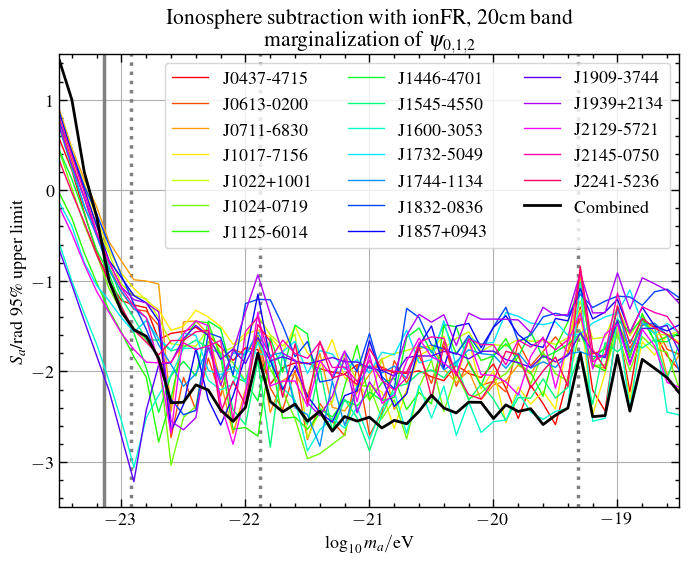

In [11]:
_res0 = np.array([ 0.324, -0.026, -0.356, -0.714, -0.998, -1.29 , -1.541, -1.677,
       -1.818, -1.66 , -1.656, -1.562, -1.549, -2.454, -2.107, -2.368,
       -1.483, -1.67 , -2.285, -1.696, -2.348, -1.667, -2.072, -2.03 ,
       -2.145, -1.746, -1.977, -2.   , -2.009, -1.729, -2.289, -1.723,
       -2.016, -2.256, -2.305, -2.103, -1.778, -1.813, -2.182, -1.995,
       -1.841, -2.164, -0.84 , -1.76 , -1.968, -1.278, -1.692, -1.412,
       -1.52 , -1.593, -1.701,  0.796,  0.38 , -0.023, -0.462, -0.789,
       -1.076, -1.28 , -1.407, -1.911, -1.898, -1.684, -1.759, -1.718,
       -1.658, -2.542, -1.559, -1.398, -1.865, -1.654, -1.802, -1.855,
       -1.676, -1.957, -1.951, -2.112, -1.88 , -2.1  , -2.206, -2.071,
       -1.681, -1.618, -1.635, -2.047, -1.641, -1.702, -1.705, -1.927,
       -1.654, -1.731, -1.636, -1.763, -1.651, -0.882, -1.895, -1.81 ,
       -1.135, -1.577, -1.286, -1.35 , -1.392, -1.59 , -0.191, -0.48 ,
       -0.818, -1.117, -1.349, -1.58 , -1.757, -1.898, -1.905, -2.682,
       -1.584, -1.441, -1.495, -2.352, -2.804, -2.247, -1.347, -2.16 ,
       -2.108, -2.105, -2.386, -1.882, -2.055, -1.773, -2.334, -1.811,
       -2.35 , -2.259, -1.885, -1.632, -1.84 , -1.903, -2.028, -1.649,
       -2.034, -2.044, -2.116, -2.259, -1.834, -1.62 , -2.184, -1.669,
       -1.358, -1.973, -1.588, -1.479, -1.929, -1.537, -1.719, -2.121,
       -2.176,  0.705,  0.276, -0.083, -0.483, -0.8  , -1.067, -1.207,
       -1.244, -1.342, -2.55 , -2.644, -2.51 , -1.717, -2.154, -1.774,
       -1.341, -0.934, -1.369, -1.799, -1.875, -2.343, -2.49 , -2.274,
       -1.854, -2.455, -2.115, -2.315, -2.036, -1.602, -1.37 , -1.456,
       -1.374, -1.714, -1.357, -1.423, -1.422, -1.424, -1.432, -1.57 ,
       -1.292, -1.383, -1.373, -0.916, -1.354, -1.352, -0.912, -1.312,
       -0.966, -1.033, -1.105, -1.251, -0.665, -1.046, -1.443, -1.829,
       -2.212, -2.717, -3.216, -2.427, -1.927, -1.902, -1.637, -1.492,
       -1.604, -1.867, -1.753, -1.914, -1.624, -1.884, -1.838, -1.885,
       -1.916, -1.883, -1.846, -1.893, -1.896, -1.961, -1.988, -2.052,
       -1.846, -1.829, -1.829, -1.779, -1.8  , -1.861, -1.779, -1.775,
       -1.869, -1.903, -1.956, -1.827, -1.893, -1.824, -1.574, -1.782,
       -1.85 , -1.436, -1.909, -1.526, -1.525, -1.493, -1.793,  0.856,
        0.411,  0.009, -0.39 , -0.776, -0.965, -1.163, -1.243, -1.443,
       -2.656, -2.365, -1.75 , -2.311, -2.592, -2.271, -1.828, -1.146,
       -1.878, -2.2  , -1.939, -2.272, -2.455, -2.559, -2.267, -2.215,
       -1.658, -2.075, -2.386, -2.246, -1.714, -1.498, -1.962, -1.5  ,
       -1.47 , -1.738, -1.514, -1.385, -1.593, -1.703, -1.734, -1.415,
       -1.442, -1.086, -1.42 , -1.344, -1.204, -1.568, -1.292, -1.499,
       -1.553, -1.485,  0.739,  0.426,  0.045, -0.258, -0.605, -0.942,
       -1.255, -1.534, -1.886, -2.306, -2.478, -2.43 , -1.574, -1.625,
       -2.039, -1.251, -1.204, -1.209, -1.492, -1.837, -1.669, -2.116,
       -2.091, -1.778, -2.004, -1.581, -2.056, -2.193, -1.304, -1.405,
       -1.707, -1.752, -1.812, -1.603, -1.797, -1.508, -1.292, -1.67 ,
       -1.599, -1.398, -1.358, -1.39 , -1.145, -1.294, -1.224, -1.169,
       -1.178, -1.27 , -1.12 , -1.092, -1.188,  0.697,  0.266, -0.177,
       -0.504, -0.884, -1.115, -1.308, -1.405, -1.708, -1.924, -2.163,
       -2.025, -1.745, -2.088, -1.794, -1.818, -1.566, -1.825, -1.789,
       -2.402, -2.476, -2.825, -2.108, -2.596, -2.162, -1.935, -2.017,
       -1.941, -2.077, -1.715, -1.773, -1.981, -1.893, -1.76 , -1.803,
       -1.819, -1.965, -1.798, -1.963, -1.894, -1.956, -1.808, -1.782,
       -1.833, -1.834, -1.296, -1.788, -1.479, -1.468, -1.601, -2.005,
       -0.141, -0.396, -0.798, -1.05 , -1.222, -1.407, -1.565, -1.439,
       -1.638, -1.762, -1.58 , -1.601, -1.987, -2.035, -1.949, -2.118,
       -1.676, -1.946, -1.782, -1.667, -2.021, -1.77 , -1.808, -1.978,
       -1.87 , -2.017, -1.788, -1.816, -1.545, -1.905, -1.87 , -1.441,
       -1.943, -1.623, -1.697, -1.679, -1.349, -1.392, -1.465, -1.484,
       -1.452, -1.6  , -1.587, -1.467, -1.398, -1.356, -1.1  , -1.467,
       -1.587, -1.469, -1.581, -0.591, -1.004, -1.36 , -1.701, -2.104,
       -2.546, -3.06 , -2.511, -2.262, -2.041, -1.745, -1.743, -2.096,
       -2.203, -2.143, -1.768, -1.806, -1.822, -2.179, -2.32 , -2.878,
       -2.644, -2.518, -2.625, -2.394, -2.753, -2.406, -2.224, -2.683,
       -2.154, -2.515, -2.162, -2.706, -2.336, -2.673, -2.554, -2.537,
       -2.234, -2.449, -2.529, -2.441, -2.408, -1.028, -2.549, -2.517,
       -1.41 , -2.417, -1.524, -1.523, -2.449, -2.48 ,  0.69 ,  0.236,
       -0.176, -0.483, -0.845, -1.189, -1.411, -1.647, -1.655, -1.774,
       -1.735, -1.654, -1.738, -1.807, -2.423, -2.589, -1.881, -2.836,
       -1.796, -2.353, -2.584, -1.96 , -2.657, -2.307, -2.515, -2.878,
       -2.483, -2.174, -2.138, -2.017, -1.983, -2.071, -1.903, -2.319,
       -2.141, -2.305, -2.541, -2.288, -2.296, -2.082, -2.294, -2.176,
       -1.782, -2.361, -1.681, -1.784, -1.65 , -1.74 , -1.648, -2.078,
       -1.682,  0.439,  0.123, -0.263, -0.66 , -0.925, -1.282, -1.574,
       -1.965, -2.452, -2.045, -1.889, -2.05 , -1.444, -1.531, -2.054,
       -2.116, -2.325, -1.629, -2.009, -1.489, -1.585, -2.414, -2.503,
       -2.318, -2.38 , -2.228, -2.32 , -2.286, -1.625, -1.52 , -1.793,
       -1.483, -1.506, -1.912, -2.155, -1.828, -1.695, -1.84 , -1.563,
       -1.849, -1.785, -1.701, -1.581, -1.875, -1.734, -1.426, -1.572,
       -1.418, -1.665, -1.672, -1.564, -0.035, -0.31 , -0.693, -1.02 ,
       -1.326, -1.568, -1.839, -2.064, -2.78 , -2.297, -1.672, -1.448,
       -1.462, -1.84 , -2.638, -2.618, -2.715, -1.828, -2.516, -2.505,
       -2.637, -2.464, -2.662, -2.16 , -1.711, -2.317, -2.126, -2.077,
       -2.42 , -2.233, -2.357, -1.488, -1.801, -1.629, -1.879, -1.829,
       -1.637, -1.919, -2.009, -2.273, -1.734, -1.455, -1.006, -1.922,
       -1.995, -1.423, -1.849, -1.36 , -1.673, -1.614, -1.585,  0.43 ,
        0.019, -0.383, -0.71 , -1.085, -1.335, -1.52 , -1.648, -1.841,
       -3.035, -2.507, -2.384, -1.669, -1.797, -1.903, -2.102, -1.61 ,
       -1.974, -2.217, -2.523, -2.962, -2.907, -2.805, -2.701, -2.149,
       -2.163, -2.52 , -2.314, -2.745, -2.175, -1.874, -2.441, -2.024,
       -2.301, -2.238, -2.107, -2.025, -1.839, -2.141, -1.785, -2.026,
       -2.105, -1.548, -1.934, -1.928, -1.593, -1.992, -1.617, -1.747,
       -1.789, -2.198,  0.864,  0.436,  0.035, -0.4  , -0.699, -1.039,
       -1.157, -1.199, -1.407, -1.693, -1.715, -1.721, -1.527, -1.797,
       -1.732, -1.615, -1.384, -1.596, -1.719, -1.588, -2.739, -2.428,
       -2.346, -1.813, -2.112, -2.316, -1.867, -1.802, -1.769, -1.727,
       -1.742, -1.742, -1.636, -1.562, -1.781, -1.703, -1.72 , -1.647,
       -1.665, -1.66 , -1.702, -1.63 , -1.225, -1.64 , -1.621, -1.289,
       -1.607, -1.39 , -1.588, -1.598, -1.56 ,  0.772,  0.424,  0.071,
       -0.312, -0.659, -0.916, -1.084, -1.215, -1.321, -1.547, -1.5  ,
       -1.325, -1.398, -1.505, -1.701, -1.584, -1.546, -1.621, -1.784,
       -1.501, -1.797, -1.947, -1.649, -2.069, -2.167, -2.155, -2.225,
       -2.631, -2.199, -1.823, -1.754, -1.612, -2.084, -1.66 , -2.192,
       -1.992, -2.566, -2.171, -2.361, -2.221, -2.414, -1.643, -1.319,
       -2.477, -2.019, -1.502, -2.306, -1.674, -1.819, -1.597, -1.677,
        0.887,  0.465,  0.121, -0.183, -0.57 , -0.782, -0.988, -1.002,
       -1.035, -2.442, -1.454, -1.442, -1.591, -2.108, -2.685, -2.202,
       -1.63 , -2.452, -2.099, -2.022, -2.267, -1.801, -2.395, -2.436,
       -2.233, -2.031, -1.857, -2.419, -2.227, -1.749, -1.71 , -1.973,
       -2.124, -1.99 , -2.312, -2.151, -2.101, -1.928, -2.028, -1.81 ,
       -1.898, -1.803, -0.924, -1.94 , -1.963, -1.27 , -1.837, -1.464,
       -1.509, -2.042, -1.81 ,  0.753,  0.324, -0.087, -0.5  , -0.847,
       -1.122, -1.315, -1.334, -1.492, -2.73 , -2.066, -2.43 , -1.853,
       -2.27 , -1.752, -1.816, -1.605, -2.181, -2.422, -1.989, -2.751,
       -2.354, -2.549, -2.708, -1.936, -2.701, -2.459, -1.881, -2.129,
       -1.829, -2.132, -1.671, -2.164, -1.891, -2.153, -2.109, -2.226,
       -1.684, -1.936, -1.78 , -1.618, -1.786, -1.407, -1.806, -1.756,
       -1.472, -1.742, -1.492, -1.471, -1.755, -1.813,  0.562,  0.221,
       -0.247, -0.69 , -1.009, -1.217, -1.266, -1.297, -1.648, -1.58 ,
       -1.558, -1.513, -1.603, -1.733, -1.878, -1.74 , -1.76 , -2.141,
       -1.959, -1.906, -1.907, -1.969, -2.007, -2.029, -1.927, -1.948,
       -1.952, -2.017, -2.02 , -1.993, -2.059, -2.102, -1.931, -2.021,
       -2.067, -1.917, -2.184, -2.519, -2.151, -2.355, -2.587, -2.072,
       -1.288, -2.207, -2.436, -1.476, -2.226, -1.42 , -1.576, -1.826,
       -1.986])


_res0 = _res0.reshape((19,51))
PSRNS = ['J0437-4715',
 'J0613-0200',
 'J0711-6830',
 'J1017-7156',
 'J1022+1001',
 'J1024-0719',
 'J1125-6014',
 'J1446-4701',
 'J1545-4550',
 'J1600-3053',
 'J1732-5049',
 'J1744-1134',
 'J1832-0836',
 'J1857+0943',
 'J1909-3744',
 'J1939+2134',
 'J2129-5721',
 'J2145-0750',
 'J2241-5236']
res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24


cmap = matplotlib.cm.get_cmap('hsv')
colors = cmap(np.arange(len(res0))/len(res0))


fig,ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

for i in range(len(res0)):
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])


ax.plot(l10ma,ul_full_ion_20,label="Combined",lw=2,color='k',ls="-")



ax.legend(ncol=3)


plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
plt.ylabel(r"$S_a$/rad 95\% upper limit")

plt.title("Ionosphere subtraction with ionFR, 20cm band\n"+r"marginalization of $\psi_{0,1,2}$")
plt.savefig("Figures/all_pulsars_20.pdf",bbox_inches='tight')
plt.savefig("Figures/all_pulsars_20.jpg",bbox_inches='tight')

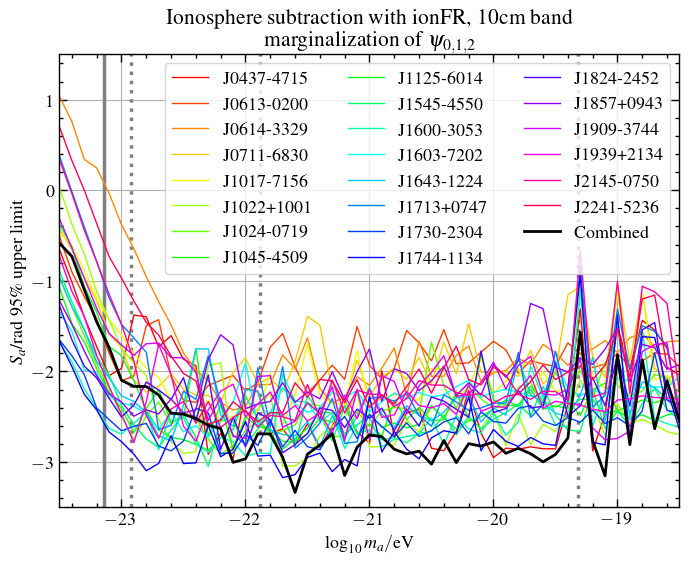

In [10]:
_res0 = np.array([0.6987882859292722, 0.328393065631788, 0.0009751117834806463, -0.3667087154461266, -0.7306610489235996, -0.9691925363049968, -1.2225577847516111, -1.458142168380378, -1.5986770342374164, -1.8291610327421501, -2.0227549832627734, -2.1035124682438093, -2.5817267472797782, -2.53565639774986, -2.3340022494291377, -2.4432877237466077, -2.5544319636663038, -2.456641251316149, -2.4541888514765127, -2.1255836503458254, -2.2832565348129523, -2.0885536419956723, -2.104635761703084, -2.3450837809098037, -2.0919887084384654, -2.39808717168392, -2.257199233104658, -2.359294174763847, -2.1647213870334348, -1.972582808644081, -2.2396409026895805, -1.957975644277834, -1.7227338352857047, -2.0898625064298595, -2.1474381083709613, -1.9503704061822316, -2.0429283509948024, -2.2514213600126833, -2.111687686573991, -1.928293313562712, -2.0895681043166676, -2.007020123639871, -1.9387732023153765, -2.089764464347926, -1.9326270429801227, -1.5285088010234718, -2.063477253809499, -1.200828141544362, -1.157590073267365, -1.9520151758007356, -2.040978468591813, 0.33824269112634503, -0.03663671617337383, -0.4400120564786085, -0.7893550330079347, -1.147427716491138, -1.4784111803769326, -1.8825846568370674, -2.4868940856245882, -2.739166684170669, -2.416130312662897, -2.332933765272971, -2.571965972195901, -2.334018168367685, -2.6189271780728243, -2.5089014459160204, -2.426394440460448, -2.613557337047155, -2.4846770484148473, -2.5006498363295266, -2.5428269525809997, -2.1430449817322024, -2.5293451692449844, -2.0960671228050574, -2.4597546358062745, -2.2060151937014205, -2.248993855798388, -2.2556339912913286, -2.3867494804153115, -2.2999656544154634, -2.100662491715105, -2.1499355826462354, -2.1521262986371887, -2.2341043489511043, -2.264742914455572, -2.241378704100339, -2.3492888045179225, -2.273311363881409, -2.2528814033410343, -2.3071937291482008, -2.218027975434253, -2.221943279087861, -2.318358060383153, -0.6674972203037545, -2.280074567034031, -2.2392657737787167, -1.0060297730544079, -2.2439165327275807, -1.0606084465916326, -1.1209393794673466, -1.2500805560434838, -2.2359137311462915, -0.7304083046574791, -1.1151260680472639, -1.3910510350389602, -1.825840626641296, -2.163563348615837, -2.4694025411460228, -2.785790642984485, -2.335073107883742, -1.7020268908670007, -2.035506139933566, -2.6046357277951704, -2.7686878943169373, -2.422873648785063, -2.2181396830398046, -2.139837001553076, -2.5025421128347576, -2.357672511704511, -2.226630221994017, -2.4855091368436772, -2.3761978587002694, -2.5485513175390624, -2.4586479612999645, -2.688308757033097, -2.2636732636769894, -2.520404499783351, -2.1953200045517023, -2.507063528164827, -2.477855334976101, -2.219923017663205, -2.3767666364316344, -2.4027855619928524, -2.353209469782768, -2.474566616450987, -2.149732916914967, -2.441551601534636, -2.384719514526358, -2.397521783200935, -2.2018756413740235, -2.044909751900082, -2.407236138845744, -2.328778712154838, -2.3529632100051656, -2.36996415028869, -2.416650919515567, -2.4434626408771734, -2.3149911839219777, -2.3048619053055015, -2.2686890683672236, -2.287552544907759, -2.2946875867222647, -2.308313246890884, -0.31536997667829636, -0.6380653327730145, -0.9692284675540692, -1.3021894001943783, -1.5791331301299123, -1.707699874087612, -1.8216332450558614, -1.6945565154325004, -1.685712971487251, -1.8480429695459744, -1.8487186381118927, -2.0114869076385165, -2.539150330754815, -2.2943120886752095, -2.7191719170649318, -2.7372741030988235, -2.056121412743349, -2.045624536347629, -2.6175176719968523, -2.549074264385463, -2.3470176510449563, -2.4604877554319042, -2.169625735386678, -2.7620553538104375, -2.1947855988461322, -2.75197958309315, -2.044477516334243, -2.1113869943022823, -2.4622397519089474, -2.159164974036884, -2.0109478312667814, -1.8262559756103, -2.278711203500198, -2.247943044466358, -2.119388306822131, -1.8978672985568612, -2.1947809026444896, -1.936650667895313, -1.833673572334688, -2.2490475398127874, -2.2610319906282914, -2.200213130594466, -1.8639801159293925, -2.6223760252806403, -2.754757351634681, -2.7396490424860622, -2.657711645688742, -1.7807528745370447, -1.7036005423525593, -1.6852304572160053, -2.5426246588775383, -1.220600762733265, -1.4806296415829063, -1.7730703333306441, -2.0483353937569997, -2.2467148936731434, -2.3373988189581496, -2.4940521939173887, -2.423274010237034, -2.468119191000067, -2.302428326949207, -2.4574338439069736, -2.421312413318368, -1.8684159747098232, -1.59562130310453, -1.7063989479018258, -2.4103597963139847, -2.357880508228291, -2.331127060536617, -2.1240140529210954, -2.3401384620267294, -2.227799553617748, -2.3023481559515506, -2.0042709132360255, -2.3131164935503428, -2.004507002170111, -1.7527425096923488, -2.330960918649403, -1.970124930726459, -2.0229390967661103, -2.2113733890492564, -2.101300173480576, -1.9420057480342812, -2.2663416446840423, -2.1256192999096455, -2.2607921199228915, -1.922209082537248, -2.0634358687764442, -1.8809396366393463, -1.2500158660493608, -1.3075178161716616, -1.95550185185037, -2.005264514196605, -1.8525580092105012, -1.9219478853433978, -1.7553269943252645, -1.5191484367322539, -2.1141731113497766, -1.7010975032212858, -1.7377024594086323, -1.977147323586998, -1.9270775924195256, -1.2741233436039225, -1.6501635430645054, -1.9413646143384309, -2.0710618829782237, -2.296321380816863, -2.502881242677682, -2.3720421456671072, -2.1170505227142637, -2.205072098605202, -2.308890882762834, -2.0683650002219562, -2.54341598324462, -2.037978324292582, -2.859528468836991, -2.504914302339156, -2.832176472691775, -2.4554566263589277, -2.532087549032833, -2.8974298257729845, -2.8077797006307534, -2.684639863860359, -2.4032904773192785, -2.4296039688184403, -2.6187076824375266, -2.4163397641396855, -2.5148956309061785, -2.403998781224235, -2.6515879909642748, -2.417588923032566, -2.6040909672871644, -2.281677970270743, -2.32812742659866, -2.4173193901540384, -2.50537887754598, -1.772906397627256, -2.4538847547417086, -2.409749994559874, -2.2109677087331634, -2.402718204502054, -2.385135686763759, -1.905671952702527, -2.4971466594423473, -2.3793438154821263, -2.0667417747269012, -2.379220076599277, -1.820085728142071, -2.380652176353198, -1.54157484949856, -1.4600365310347208, -2.3188753485603053, -2.362021349146847, -1.6674532181510826, -1.9460917644554705, -2.252561187292362, -2.4248198243989663, -2.6685296252769093, -2.774477214129302, -2.912403678233692, -3.095526523585941, -3.0148242682056665, -2.7098174796142396, -3.0168478857929903, -3.0086399049419805, -2.5979167351274026, -2.9414819301523605, -2.8573600498168035, -2.5534995974915677, -2.933911947600129, -2.9245271913013573, -3.172265659521329, -3.138648041952101, -2.9487788277040092, -2.9008821662396977, -3.1053034190971167, -2.9715457804098837, -3.042150992203734, -2.274324288584458, -2.888717307439278, -2.663036594977938, -2.8586044695657753, -2.964432187197635, -2.7330509221766794, -2.6539241743042474, -2.6819998844438553, -2.2839333261082184, -2.8754522731764762, -2.6401075621506576, -2.7706313389756287, -2.8279440303174455, -2.7290736983893162, -2.798670275420041, -2.8162605344857536, -2.1821651693345414, -0.9398782036325797, -2.7804860409130225, -2.8109603248736854, -1.377866691102349, -2.7565602448746978, -1.6158919863295935, -1.6259884370921238, -2.1960356471792535, -2.642908364560712, -1.652408898875372, -1.8265484785242019, -2.034371055145584, -2.4027598211642593, -2.530720848869758, -2.6546211869575185, -2.605833414032174, -2.573392844827728, -2.823504823951688, -2.8769563914400162, -2.7677054023750793, -2.4056861790732373, -2.4586837393065397, -2.9055753736557572, -2.901708505168681, -2.691186031212167, -2.8173506297661532, -2.537016069325514, -2.833817928556984, -2.6511102972365075, -2.8304670525734488, -2.8652395046714414, -2.63694751383108, -2.4977838648871318, -2.741555598128537, -2.4765429571998276, -2.6084582289323546, -2.72176066857475, -2.567560175114569, -2.715800346077504, -2.6524490910296206, -2.556868960736807, -2.5109325519033825, -2.68879986163091, -2.4465268884408387, -2.55263205391638, -2.5703165251200444, -2.406966175508388, -2.3772914158203795, -2.5487789458370345, -2.5961288036643007, -2.5083574290575124, -2.5606591947104635, -2.426671634302878, -2.57412735396724, -2.510300709405908, -2.602381046937378, -2.4369299560533104, -1.7936779197060395, -2.4303004688509073, -2.4573491114406254, 0.3784849239696093, -0.01548244832545934, -0.40480853770667885, -0.7849070656738578, -1.1886524861437877, -1.4792857094606207, -1.6307027676491648, -1.7895131600567418, -2.641325825424195, -2.5951046020468445, -2.217817994258011, -2.307957252455261, -1.827914224958794, -2.351570617554704, -2.699730175629361, -2.804450949996842, -1.95927833786769, -2.613512993379903, -1.9466830281551566, -2.845703873352556, -2.7308968315955133, -2.569829391415992, -2.2986280878019065, -2.793060659901112, -2.777329204908078, -2.298799663110065, -2.276543473449889, -2.3289076770331953, -2.2381843839466127, -2.486791428343571, -2.6041817987915867, -2.256472782087788, -2.3371304824866233, -2.4291183410212973, -2.4025736849258728, -2.350698055904218, -2.347973755883087, -1.7913035731779463, -2.5080244923769834, -2.363154495278772, -1.7787515793032624, -2.3341907425984485, -0.8396036100370846, -2.394908482044738, -2.26282427338067, -1.3079343761929512, -1.9849715614228305, -1.4946083281268092, -1.5586556752427727, -1.7186940959642847, -2.501174764097145, -0.958786052984834, -1.2829550255868676, -1.5379170867584717, -1.8914311592744495, -2.0706214443178577, -2.268930201100683, -2.332938126522846, -2.452673138280551, -2.7127660899248505, -2.7644232773247936, -2.372697075093206, -1.750317094785942, -1.7520970722128424, -2.483588571894119, -2.6058459664510836, -2.1969468007913258, -2.2257777608614067, -2.6525965500577895, -2.6957617882078253, -2.711075885681482, -2.552001851178439, -2.8357795384598954, -2.4917333409064173, -2.7363927426911525, -2.494454224027681, -2.176205937428722, -2.46999470532626, -2.6190245747899215, -2.3798194923339246, -2.4843184372014004, -2.5440759655757623, -2.4491682329726947, -2.28883006868616, -2.2746163582553423, -2.557931180045824, -2.4024575197015325, -2.4820514077484814, -1.853999109690256, -2.2592007452316256, -2.3460631655658517, -2.4608368668644864, -2.4998460387270063, -2.263359441642045, -1.8464578805023335, -2.5483896848724297, -1.9447403092041573, -2.463530912965401, -2.11490232441463, -2.178439145080879, -2.3052074777973286, -2.474131325968986, -1.3483671587877182, -1.5547565565880206, -1.9825868115408967, -2.0165587344878606, -2.276392736565395, -2.3458441469370435, -2.3855537493210366, -2.462710874680289, -2.638761042423523, -2.4487725359172203, -2.66593763483488, -2.5989409517143405, -2.7274302168891094, -2.5111846319562536, -2.343148063140929, -1.9004765044894758, -2.5959520322134493, -2.4535239661456916, -2.1787907784081453, -2.3577209901007823, -2.450073293992759, -2.4011719136923158, -2.230905456810831, -2.285227429036963, -2.211952061805673, -2.443802715268186, -2.3320549749659962, -2.2383718506601733, -2.302591165578046, -2.2304346118413862, -2.281351527942807, -2.2584160437407363, -2.1672961596577447, -2.0995924033015236, -2.2834080678983946, -2.229551205684266, -2.1969537327536504, -2.227399904649482, -2.273054056765811, -2.2777736546979193, -1.8831431453026308, -2.1871593413615416, -2.2682936790936408, -2.1981706009011592, -2.2494779783699395, -2.076692291432023, -2.104750049980058, -2.1774599468396545, -2.1700167880363574, -2.175774072755725, -2.0608553309379967, -1.6834105411111315, -1.8949608402926306, -2.1905944823539008, -2.408396259831328, -2.6313347936607148, -2.690799085178709, -2.5731312009291685, -2.445261793811858, -2.8660769032356703, -2.4423496431604748, -2.5103906053211524, -2.8040329736217195, -2.892114133700153, -2.7264838415363126, -2.774618458296908, -2.9319541711725208, -2.9029691855566564, -2.9035166765508675, -2.0328748889163437, -2.3279792876711336, -2.339258504677823, -2.5535214830518194, -2.4581150588860843, -2.8501026616429375, -2.5868860970524388, -2.493278730605837, -2.832622556652165, -2.7487124671288727, -2.7174720406402786, -2.6935479741678, -2.510514007073448, -2.807284518937988, -2.4845523129122076, -2.634993801586278, -2.677052800827245, -2.456825250003463, -2.7047873245842413, -2.5586400692060685, -1.9393726090646928, -2.290512359707751, -2.5915273605896463, -2.6164461296319863, -1.0934711207015222, -2.599783838202083, -2.2210097789096728, -1.4823898529988537, -2.536761069932301, -1.5533261390283333, -2.523468673107672, -2.5762040283172105, -2.615751220850435, -0.8956439939731297, -1.2314091800987583, -1.5405924881039637, -1.8313617060808896, -2.0373644562244815, -2.374650300321748, -2.58773617882467, -2.7456330464170264, -2.838309176000643, -2.649035106397685, -2.4691825367504254, -2.7288091795974667, -3.0466610383596815, -2.5328370076869775, -2.549987751164327, -2.8147914294411254, -2.636522558551119, -2.4419810332189638, -2.4882162024983283, -2.806914126257651, -2.264417983775043, -2.470756612665752, -2.7653059956586277, -2.382638057663927, -2.6828718766286093, -2.6485572850992574, -2.755255089283985, -2.7297691443013354, -2.7882565515224083, -2.680876777858455, -2.660996514860884, -2.4813640429184347, -2.700372006207711, -2.494493725716004, -2.6341605329113276, -2.5283718108013615, -2.4535879694643077, -2.3596623375085333, -2.4901269367860137, -2.1653161599604323, -2.481055167477878, -2.6457631886018276, -2.661378857638308, -2.1915520540279476, -2.629514949478748, -2.436968244530546, -2.6015662866334974, -2.3556975906372175, -2.187790109200713, -2.423883088030728, -2.527939603413476, -0.37270470395879457, -0.628321482422294, -1.0624322589063728, -1.3431985174795802, -1.7248626741677673, -1.8245822518419736, -2.101201589210304, -2.428880676908492, -2.6467806884839256, -2.725706805610039, -2.7526845525439185, -2.8054947555343293, -2.869776905916503, -2.733363555513046, -2.638713179456204, -2.27131577432518, -2.5244463891565916, -2.6819040909482355, -2.856775724606881, -2.7425804985554647, -2.6245836854293865, -2.444577768060994, -2.4595336000690886, -2.687047849150223, -2.5935374616140177, -2.467919432710926, -2.6175663546160686, -2.5707484559779825, -2.621797396317442, -2.583252993027387, -2.3767605387187705, -2.5139919579341634, -2.6353270242656697, -2.543157353723353, -2.5007774076038984, -2.4147730821713953, -2.313780765612144, -2.3876153754302023, -2.1978681928843145, -2.4157967567983594, -2.3807359928432876, -2.4074467302419396, -2.304303923461786, -2.3109768585308355, -2.4598533939581104, -2.4361685583903276, -2.5205323929012957, -2.4787515942035543, -2.540064004165361, -2.479834309834451, -2.460774527004533, -1.0749948757085377, -1.4706393351185127, -1.6759000536152635, -1.9705796613548492, -2.229613016414086, -2.4103005406807663, -2.6766242666532243, -2.4081671183031865, -2.2003897570702473, -2.5610386461601538, -2.506683945657333, -1.7487119001973814, -2.713636466801832, -2.366280721524832, -2.8643703578094, -2.498241607226839, -2.6104164600864492, -2.633730524105846, -2.7745043763148374, -2.7715491572633653, -2.6872868235940532, -2.514710185745551, -2.5604394240501422, -2.2933749734268933, -2.695207094791327, -2.5830107368306643, -2.711872296533138, -2.3256127699793456, -2.529137338977868, -2.3975009301482295, -2.5451753258664795, -2.5333353937576026, -2.243079287659629, -2.513547049919646, -1.7979373627358872, -2.3137158674541625, -2.3744743578374874, -2.3778613911294864, -2.1630006659723446, -2.3275964894264622, -2.3920012937649653, -2.326760995987131, -2.4834730701975753, -2.202320924174025, -2.127770152932415, -2.4347744418700192, -2.3764699722867793, -2.315699824899635, -2.344789528738757, -2.300744081580674, -2.2709603185791467, -0.9689647440972068, -1.2855235420966795, -1.6044946769520783, -1.9190108342795968, -2.1822022072562866, -2.4978241572409083, -2.7523917453070466, -2.4905155331603774, -2.336083922874475, -2.5840952622909996, -2.4603772409327678, -2.507604356028144, -2.7493380936717884, -2.914229169433655, -2.819939327154036, -2.657175670979806, -2.540420488292443, -2.7203954317259726, -2.6517038798269983, -2.5907963879771625, -2.354968376388046, -2.3805658498040994, -2.728258297256356, -2.7065625596197442, -2.442245642646833, -2.6066218187543435, -2.4358522117375663, -2.3963991322822222, -2.4102130991098853, -2.465897665547587, -1.6748714831964464, -2.164991115795223, -2.4051075676865015, -2.1687454835457447, -2.3022951125567865, -2.4049436763264986, -2.3785952750380908, -2.1730739899742217, -2.1221545241796225, -2.3909768926515738, -2.008701924355188, -2.2415523589903796, -1.9874413522770786, -2.2902937693335965, -1.8989857999302235, -2.1505101315804986, -2.271661125110801, -2.2170826176699663, -2.035012643907801, -2.068149443555144, -2.232762981812547, 0.02854177970199657, -0.37304144097009007, -0.7038925957665746, -1.119981365187962, -1.42698160704847, -1.7470852302615651, -1.9054100985077564, -2.0436317352299884, -2.5282891375581618, -2.7748006731891137, -2.9044534651805023, -2.886880229424419, -1.9341066866057293, -1.906727858003784, -2.909928655844251, -2.5187527051600025, -2.420303608419106, -2.229961795543369, -3.0458026586524025, -3.041101022232996, -2.953247774406044, -2.7125288845303563, -2.6023076010547217, -2.506046854971287, -2.2449062772932824, -2.833177682225299, -2.827809196617714, -2.8090482291370216, -2.5377053779193397, -2.673433293665761, -2.383694038219758, -2.523238849009385, -2.2116944416726203, -2.5206641404338903, -2.633054103033125, -2.4316558459100865, -2.8195740400161133, -2.469022124081595, -2.8088170951172247, -2.5810918260582407, -2.663678558771975, -2.458532003464676, -2.0923917127603646, -2.352187960894089, -2.7128638068063857, -2.3538061606829146, -2.576561595022276, -2.5308314838403194, -2.5874281133181554, -2.664754463849169, -2.696764669514578, -0.4727939601196953, -0.6081135157256456, -0.8848331499839385, -1.19302280594902, -1.4317445208655941, -1.5965341950757983, -1.8079181308770298, -1.9615528788647505, -2.066755993164386, -2.317055632337359, -2.4567340951563854, -2.507136609038908, -2.313954179281755, -2.5513707393568468, -2.5022077840690615, -2.3879846405440843, -2.4606862062144845, -2.0174561725109035, -2.584827825121409, -2.2552796890687397, -1.6962778732740131, -2.2595003606241075, -2.34867232996937, -2.367734101026591, -1.7724649522849454, -2.3635088023035378, -2.2999107014750124, -2.2529704131324717, -2.2954978233148444, -2.3170810710997687, -1.9740308717421386, -1.9693789593674855, -2.2752826066497756, -2.1806364017447732, -1.8578658715591356, -2.2418927675662266, -2.109367351909472, -1.9671203281803207, -2.2683894041779458, -2.0001067240538983, -2.220759350703385, -2.1960075719362733, -1.1330756492720742, -2.054395347751282, -2.1892691001009195, -1.1209009992949044, -2.271944731675231, -1.1290812667204264, -2.0900751747671453, -2.048301446295365, -2.0976912354143518, -0.4331109616774907, -0.6520206029149628, -0.9638097314193446, -1.2171114521025168, -1.587348590150886, -1.7321106828576358, -2.0962128601595125, -2.228044043063139, -2.164338883804358, -2.027023387181005, -2.196022525038816, -2.2583295549357594, -2.266218838643466, -2.3434637576244173, -2.009018839539793, -1.8531186647238296, -2.1361204185840204, -2.068051438013208, -2.2266807041986265, -1.8917642040664524, -1.393173061180951, -1.4894926989490576, -2.209449533699329, -2.348332519544314, -1.8745745056876975, -2.2774330491797636, -2.060874539858678, -1.9666417732400034, -2.087980432624512, -1.8456927518920596, -2.1342541046551724, -1.6788981283144033, -2.0267544530390285, -1.4732691080894238, -2.008780549419924, -2.0119910559422958, -2.002120603284265, -2.05340188870237, -1.7675109819701995, -2.1390764268833546, -2.0053295901483774, -1.1546739669295447, -1.0607444575597802, -1.830712733893637, -2.066726567308526, -1.0340629493947893, -1.8953889259641705, -1.1293444604538956, -1.9636467955460162, -2.102760938638539, -1.957705101407789, 1.0373058961514146, 0.757926584130947, 0.34144396973230773, 0.245294319784953, -0.03357410958508314, -0.37875511778769766, -0.6455956214218398, -0.9549021513005872, -1.2306165796292525, -1.4869699622237593, -1.7957791028315995, -1.9878641418970642, -2.1043380923877892, -2.34391165203552, -2.4265492611102792, -2.385327320660614, -2.145182634659977, -2.144271570692822, -1.8176462773020707, -1.9748894914953536, -1.6290421996375328, -2.187587277242656, -2.349037416013605, -2.2786716757633276, -2.0583332506648313, -2.1539604382373962, -1.9632202301617825, -1.7406164423849386, -2.2684485796229685, -1.6638740139052723, -2.053173354028627, -2.0528873027451295, -1.8241361719469054, -1.718754440457088, -2.110528241009303, -2.017720780315213, -1.990576233842728, -1.854992987044883, -1.9242427639281199, -1.7007946174674813, -1.795779667159468, -1.9328069909812298, -1.8004812862627166, -1.7528277011048246, -1.6587113343068007, -1.7937353664237474, -1.626885297710396, -1.5778893918519505, -1.7298703075436996, -1.6721090659192965, -1.6624539420792228, -0.5106141853280687, -0.9009843988693533, -1.1741447637163454, -1.4244694062384367, -1.7984880381129613, -2.102764500072033, -2.05056925850675, -1.4940532245478617, -1.4288710527655342, -2.052871219608637, -2.3168905377682503, -2.3408496487917456, -2.1539186312618064, -2.098168269578225, -2.043756234410522, -2.2159738264046096, -2.126413087912836, -1.7310273276426442, -1.5820825983892848, -1.9481227473193403, -2.241824075697328, -2.095123195917372, -1.9298584322701566, -2.087949289422175, -1.5030992598592223, -1.9330715965622078, -2.0809601423351745, -1.9644987469902415, -1.5480333553659302, -1.684793080040006, -1.8821847060997998, -1.5389785746857139, -1.9149740875692705, -1.9050933571594444, -1.7881141393289997, -1.6670940408922372, -1.7626429386970266, -2.019073155149687, -1.8801700536600672, -1.917948192835825, -1.9432190202665898, -1.6851208694470634, -1.8027562096816763, -1.9580978933813098, -1.9172196770755472, -1.8040697304807343, -1.9412200988286603, -1.8846106517318897, -1.796102453780165, -1.8097726012556195, -1.949493005738032, -0.6552276345907209, -1.0125542941383845, -1.3996550108538255, -1.7256051111945865, -2.046242146452823, -1.9668725802875913, -1.3772250219993933, -1.3976342371336807, -1.7286829409463353, -1.6047057905416944, -1.865541472388799, -1.937843568273624, -2.913594851557999, -2.6828300401037755, -2.970062195225774, -2.189986230974347, -2.218845874417081, -2.6845738990021046, -2.634722954412429, -2.8088602078488867, -2.57791535883667, -2.8466789403791295, -2.5997973034898947, -2.378388590955857, -2.6654211031162296, -2.792059212415879, -1.9959840382213536, -2.72562248704723, -2.458985822095733, -2.4163657544865096, -2.8466223326204676, -2.8751475439249226, -2.661822229683752, -2.210025828266339, -2.680499887792229, -2.9500902670648235, -2.8469428479428953, -2.858145852330778, -2.8320755400267115, -2.853411469759462, -2.8538901850389706, -2.369776567454975, -1.3078626181329105, -2.87792300793641, -2.4724588189113135, -1.50305654714622, -1.9699070943840622, -1.435528751662455, -1.544225002871549, -1.745570943131837, -2.418145631253419])


_res0 = _res0.reshape((22,51))
PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24


cmap = matplotlib.cm.get_cmap('hsv')
colors = cmap(np.arange(len(res0))/len(res0))


fig,ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

for i in range(len(res0)):
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])


ax.plot(l10ma,ul_full_ion_10,label="Combined",lw=2,color='k',ls="-")



ax.legend(ncol=3)


plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
plt.ylabel(r"$S_a$/rad 95\% upper limit")

plt.title("Ionosphere subtraction with ionFR, 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")
plt.savefig("Figures/all_pulsars_10.pdf",bbox_inches='tight')
plt.savefig("Figures/all_pulsars_10.jpg",bbox_inches='tight')

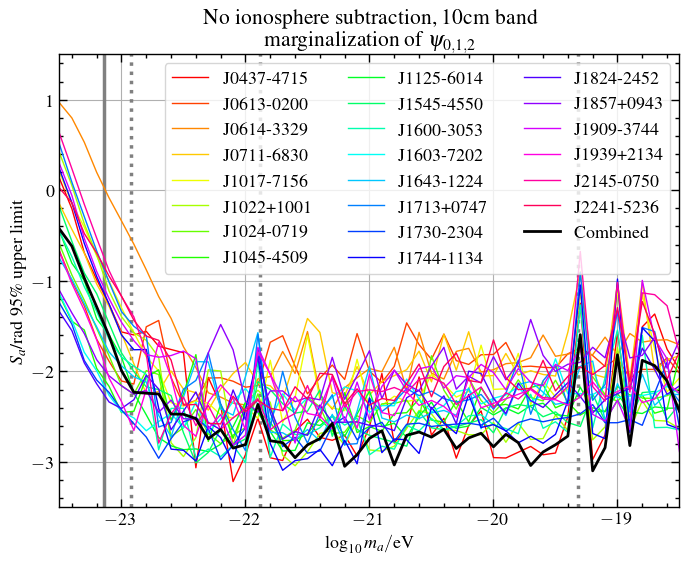

In [9]:
_res0 = np.array([0.024592439658770483, -0.13829663774666723, -0.4772137086085056, -0.692684099771055, -0.9479992065377916, -1.167920516991304, -1.4344094161753729, -1.6105061291613048, -1.656205674780378, -1.8749188523170595, -2.3711869306557385, -2.363799784676062, -2.572428352331522, -2.578974913448596, -2.272642379117346, -2.4450232236135268, -2.317890443260241, -2.407478352442515, -2.4319874598497098, -2.1693971830051115, -2.3051275220199674, -2.0200804379750696, -2.0336247144635906, -2.3564675234006964, -2.191490028247593, -2.3716839702341384, -2.298844357612082, -2.3214277660260048, -2.1329738935413896, -1.9181018932625393, -2.2796708877497194, -1.9456199603691142, -1.7975138774304893, -2.1003263504346763, -2.1217844435769373, -1.6521082189873544, -2.0687874712985943, -2.2008801745518825, -2.186118349918505, -1.8771889190806363, -2.2147354391330687, -2.054576686524157, -1.9486279119864993, -2.0347390159684395, -1.9342934168244028, -1.2950375075867573, -2.1143549601348055, -1.229125867542362, -1.5855432987135638, -2.087844776710924, -1.782012290760134, 0.6256742667340401, 0.23830976103145837, -0.15454615304073563, -0.5279111565724601, -0.8868275877276798, -1.1719912256354414, -1.3990207096106166, -1.8039556666647063, -2.7910843456597956, -2.4705819795520885, -2.28262402355428, -2.5980778614520412, -2.3749142170521216, -2.639419961588614, -2.5107491459295006, -2.416530179185441, -2.3008645824900777, -2.6432154054786823, -2.538367990794079, -2.4626930082306444, -2.1556422678221705, -2.516595879390838, -2.0445618625764785, -2.3928965640721835, -2.221737393446839, -2.2033605710851876, -2.221725394144942, -2.1770933760525852, -2.235041502591117, -2.0866739902429727, -2.0663520750713134, -2.129662571785944, -2.3653324526355455, -2.268444010724534, -2.171916949514489, -2.3994735935428464, -2.2346863351539135, -2.304309274468523, -2.1839708119063803, -2.287884956451259, -2.298952305759664, -2.16539245731045, -0.6753984310100829, -2.1671016944423735, -2.3279495788701383, -1.0172523009989454, -2.227653860926353, -1.132948082418716, -1.152602483906766, -1.2746923932023868, -1.7968638247128546, -0.6809463028098844, -1.0309241220387426, -1.322858299323715, -1.651132571273315, -2.0729891595157595, -2.331840879447583, -2.6521940975421865, -2.1969170701959886, -1.6789404948306639, -2.067018966557556, -2.5943819516528324, -2.7159391443498224, -2.3388019681132244, -2.147417517900753, -2.298463675813704, -2.6434948200814814, -1.7806273738904124, -2.0317476792902123, -2.433182882359084, -2.275844682409268, -2.4645499181245722, -2.4902228686609074, -2.6341420029490936, -2.339994397327366, -2.624230131577007, -2.029466916342276, -2.4542438843094163, -2.486584641530023, -2.2255386094832565, -2.3747597573787558, -2.3199239389104163, -2.3863324318644143, -2.504345818308288, -2.0682140913315545, -2.4014363977907354, -2.352236177580412, -2.301202444741303, -2.25214299031249, -2.1992038553887236, -2.306727046223187, -2.312036701353037, -2.3703765519094184, -2.2811856979035507, -2.116402875940426, -2.2840308743256887, -2.2220494330698797, -2.1603427906046377, -2.3434727138834965, -2.3040046550739293, -2.1239308365179648, -2.2418778125045793, 0.29159835043350535, -0.05751096886529638, -0.5305188196650895, -0.8972763437137526, -1.196447686675267, -1.4575257826821393, -1.6605188186423236, -1.8142372433948173, -1.8427370384983848, -1.8244702332805527, -1.7752225499687766, -1.8598663095406984, -2.634025880451067, -2.4749147939787717, -2.814256828398983, -2.703068283398204, -1.7330933842841767, -2.0315242525175976, -2.2898985497844397, -2.790428748850319, -2.301808209566115, -2.403662500793836, -2.0706110628300216, -2.5564375530273917, -2.1175061417717975, -2.5335284163820524, -2.1656766467972126, -1.9843902906808195, -2.2159609613456976, -1.9705341859434475, -1.941354225536624, -2.1840298100789193, -2.0468126518630854, -2.066946435363074, -1.9223210418542773, -2.0119712273523778, -2.2026760233998592, -1.967727355585687, -2.120042776267497, -2.1575954857300794, -1.9220848235775092, -1.9906755311097726, -1.7406876769411308, -2.473725410204171, -2.5465471431376074, -2.3185452056237024, -2.644125891100897, -0.9948930617723667, -1.639859959800511, -1.8614229727574352, -2.8845536166828536, -1.1071187480473623, -1.35413978366098, -1.581430834853529, -1.8708537420483795, -2.048055838148984, -2.157905495478281, -2.2504330153344267, -2.2089981098703664, -2.450113948291341, -2.3159872982807674, -2.5217278085496746, -2.5275003927460546, -1.795862849170795, -1.481885788782262, -1.760681164204066, -2.3312422722113446, -2.449480757791362, -2.214463468420293, -2.2150619048040614, -2.333575500457431, -2.2862672137273696, -2.3129068550056613, -1.8441693502039915, -2.3071635779202406, -2.0458091622685415, -1.7712424898814116, -2.3004066471929185, -1.986821764305422, -2.1440054544971625, -2.2159533203214146, -1.9409504241961473, -1.7343764236910915, -2.195505033610397, -2.051857050210084, -2.1275945902424906, -1.8372406926937948, -2.09287412276942, -1.9095347282065411, -1.4264154139068554, -1.8226616650276513, -1.9998104754943342, -1.9208419931399376, -1.899224903512968, -1.7334142520430902, -1.8498264156550361, -1.329642703225309, -1.8507310012110105, -1.822075091532823, -1.623481835337857, -1.9635692711769897, -1.6495914394099185, -1.3422571279805386, -1.5498317024470745, -1.9052137265789606, -2.136232480406148, -2.337258994674618, -2.4092915953301883, -2.312402705130498, -2.0417718060277306, -2.1948579920150992, -2.644349913897691, -2.4380837529463406, -2.226554688456379, -2.56376427527741, -2.6431777026614665, -2.2045989133350985, -2.5332942072582165, -1.8349094802854062, -2.408717968111833, -2.748453353850838, -2.6630053168834307, -2.704369645736317, -2.3699078726576537, -2.561663838640084, -2.560156512295514, -2.556900107954138, -2.594998306580196, -2.6067053843600414, -2.653234477005224, -2.29084786497819, -2.2053984849887236, -2.416785642763734, -2.269701920691443, -2.5790148704891327, -1.9968089870151535, -2.022367285461706, -2.2981674265354752, -2.466466292273006, -2.128107497484125, -2.321352144893234, -2.3971714832116926, -2.260509004640754, -2.1234023527280335, -2.2774189507234497, -2.457613703036064, -2.312568782445218, -2.2440936783569803, -2.188342194384878, -1.7429883775873651, -1.9777766546378064, -2.252771184671901, -2.1593318831355353, 0.23525737082824288, -0.13866066989292639, -0.5852187961031381, -0.9514878970957884, -1.2566985549694407, -1.5974983675438172, -1.760404306204728, -1.7578785199130682, -2.4060632121056593, -2.8574690289246236, -2.869954824293384, -2.9891936517197792, -2.6054921094705694, -2.730421660957419, -3.0067981943278697, -2.4175422246560467, -1.8276095296098556, -2.7971559682559484, -3.0907994893776958, -2.9841711547617567, -2.96257969833633, -2.8598535173642583, -3.0402012552228963, -2.7594778082891183, -3.0193149553988627, -2.2914776477086334, -2.8961176131186708, -2.7458772548738484, -2.754255328489355, -2.905448107388998, -2.395891183055443, -2.5687565487428796, -2.6862043198272154, -2.254621785254623, -2.618426005571136, -2.586680472404813, -2.655542528153314, -2.7872423091581218, -2.7154705728393065, -2.792546675433715, -2.6943000986825782, -2.3245180767605755, -1.0457847816979031, -2.6846644476645807, -2.7411032179673316, -0.9798927644792923, -2.6747427699041952, -1.5171848289687475, -1.6639826574903258, -2.5855273957454425, -2.634536988639363, -1.2459394352804902, -1.4785402037984219, -1.878636042669314, -2.0947470454438704, -2.2320502341995265, -2.4244651285557914, -2.5766798052174185, -2.7240543024885415, -2.9582377383812415, -2.7416564188646073, -2.5561530021840317, -2.506310869264453, -2.6310931982535437, -2.97435005827733, -2.815364479006839, -2.6210836928837358, -1.7478228252301062, -2.4548515728987534, -2.8299034149190856, -2.726251930346824, -2.90149370372598, -2.878158147048013, -2.5973444858045993, -2.502015475051057, -2.7545952036625923, -2.620887277352899, -2.5611480336469206, -2.7711874232087608, -2.582439909275852, -2.570864378210501, -2.60723760875775, -2.5925737070553674, -2.58106078125401, -2.57088718154474, -2.593192007035881, -2.5157587882421004, -2.659722655693895, -2.564239985436175, -2.524084463824322, -2.5555144471723095, -2.5256988706103765, -2.5079778960276755, -2.4672682100114955, -2.3659130653012763, -2.5661237712531486, -2.56593298791345, -2.5316346315087346, -2.5940821539966703, -2.2376188978408194, -1.8969973647551333, -2.6166184983665244, 0.5058128647160182, 0.08879613770146498, -0.2912954050014534, -0.6696092040433392, -1.013774147297523, -1.3386873920654088, -1.5019686987047678, -1.604465722566603, -2.6134436101218244, -2.5641102597183987, -2.195399916431313, -2.099614055004842, -1.7938506817522286, -2.3584407621623913, -2.64196444830922, -2.8728046276028905, -1.587085981271888, -2.6185385903930705, -1.9993464065819853, -2.5050807474806143, -2.7917849329778095, -2.4612544194754147, -2.2570923059625794, -2.8058812320933226, -2.7971600258948235, -2.2965626777162784, -2.4428672060332404, -2.336252930331237, -2.190261148786017, -2.2667388348377724, -2.2170836561181058, -2.299537293784524, -2.3371529893310448, -2.3134366959314896, -2.253851360160706, -2.416099973912405, -2.2408895172477914, -1.8749987978905223, -2.472243724286877, -2.1036515363262533, -1.9346860246499484, -2.3770406440961267, -0.9052023482563168, -2.3189181120187476, -2.142800473780184, -1.3298698407324683, -2.4169003887456495, -1.5156400421339626, -1.5590522660721784, -2.151245709229033, -2.3336155356336667, -0.7539999705012759, -0.9829704594647014, -1.2525663930669888, -1.5075019063189916, -1.7852191836581635, -1.9376014160630142, -2.0591881759240724, -2.1169031980450637, -2.4846058841817715, -2.7213466633036814, -2.2823863068127572, -1.8909679335884355, -1.8946585101463111, -2.413257936287342, -2.482383896786765, -2.0568149253250345, -1.5718017990568172, -2.6715595629891613, -2.676732423411435, -2.7563623258718866, -2.6412434583065605, -2.7656594899981677, -2.4738288119884806, -2.8155783017212936, -2.440954197037442, -1.9468448972648669, -2.5142783751485642, -2.556425508758614, -2.481892506048328, -2.5201017003101827, -2.456995320832993, -2.4305890480030756, -2.4833502110576426, -2.1816000572446175, -2.6326708878051357, -2.2874239576438247, -2.4862650103187347, -2.1433320635343907, -2.1104815144513713, -2.228775849111881, -2.363071197632573, -2.338035807281684, -1.9439683683761289, -1.8851086942213175, -2.5424389419145133, -2.1336400037429257, -2.444517479313372, -2.030609955731835, -2.3737822951365106, -2.245697807881017, -2.2564582013596888, -1.1449910159574876, -1.4310833905713078, -1.7887161852407305, -1.9922881917108448, -2.264247933840289, -2.4431538420146643, -2.5131756873008646, -2.6543212229895357, -2.5523461590415706, -2.463812797079743, -2.6229296268885984, -2.337473399154642, -2.6733517202944705, -2.5217784872472695, -2.333123869815629, -2.188206508571593, -2.360003219518022, -2.5365569213123202, -2.246078045698731, -2.4268408928658802, -2.290312981137146, -2.4253257892400906, -2.2842653662692847, -2.1714839797110406, -2.2135719792593687, -2.453318716100981, -2.376858238084034, -2.378463511186088, -2.0844081376065633, -2.3052330165502237, -2.445684215528962, -2.3766162801216097, -2.2215375389564684, -2.1974249120522282, -2.3584628589745456, -2.296553438316303, -2.2588841619948896, -2.169276861929077, -2.332265121229802, -2.261464826985097, -1.860395242562241, -2.246938513438627, -2.244278753223256, -2.257585707406959, -2.171558162671154, -2.289432407996744, -2.271937881090249, -2.266144278584198, -2.238057583016343, -2.165651281390257, -2.2442974812940104, -0.45765726363722187, -0.7342459728973231, -1.0642569088703375, -1.338505462539063, -1.6450412755263915, -1.8404037509974986, -1.9413260103601426, -2.0326194626100853, -2.865058225899518, -2.407736261801076, -2.4067208859676557, -2.952807820982658, -2.8562227961471365, -2.9400876302719183, -2.814015903603319, -3.0068675960735165, -1.8891599822159557, -2.9480274979762284, -2.579689597342064, -2.6958109938699772, -2.6973360696223416, -2.6216131282609707, -2.4872892180919814, -2.592205941664677, -2.514639678471332, -2.919790897336553, -2.8247112084922543, -2.8581019904701916, -2.594581331720872, -2.656806911397444, -2.5176082018430814, -2.648278342260201, -2.5995087936686083, -2.4899211189058303, -2.478046230775963, -2.5879791110054886, -2.631065460724015, -2.687425719701753, -2.2519558345526236, -2.6275308927265013, -2.555481210543265, -2.672409500117033, -1.2649603575122303, -2.6245255332769464, -2.0678453304343165, -1.5439608029157512, -2.6028273441272995, -1.6008705842576036, -2.620111573735599, -2.6164016951381033, -2.6456943744825994, -0.18786935162016738, -0.5642411335839201, -0.9136689690060152, -1.142132279244158, -1.469156486779714, -1.7950823215575225, -2.0011621466093437, -2.169958152786912, -2.2006275708321383, -2.2661191408347454, -2.677017150439421, -3.009343886355834, -2.8936399114609666, -2.6353243194888853, -2.8177715923175364, -2.7444606318512834, -2.1134513019803194, -2.2005669281049216, -2.355786506070699, -2.459583712885342, -2.4390546305373277, -2.205041393270612, -2.715552762225978, -2.383632987252568, -2.6396245076962717, -2.7050316059177573, -2.7444837870767267, -2.7807372821956484, -2.8247651355671284, -2.4397903702093724, -2.6219688567218644, -2.6424626052410614, -2.6110409908560976, -2.5705531648720763, -2.531696896862604, -2.6776208374350867, -2.403279632850994, -2.3647723372162837, -2.3882015645539547, -2.5000050312581905, -2.44606139351386, -2.5643135883292754, -2.607491702319186, -2.247615500951134, -2.547280696168791, -2.315146338265541, -2.5197818747696674, -2.2332604696121754, -2.2210036927830235, -2.531890143812393, -2.3596163941662227, -0.45095506485144876, -0.8051716219743106, -0.9956327780839797, -1.4196681911485067, -1.5962663033458206, -1.8419432363095374, -2.238043863057494, -2.47929627353061, -2.7294313589844608, -2.8205515657041182, -2.8633230092043025, -2.8550023858633136, -2.8852433257784362, -2.8034902566926547, -2.6087453596407757, -2.3401978277031406, -2.454349605071646, -2.664057050848585, -2.8785869644245556, -2.8707871728560477, -2.5671357975279414, -2.5965822026948904, -2.493419160649086, -2.716431979782567, -2.4706139830774663, -2.216163861767873, -2.6067571804031693, -2.5717752931642512, -2.730146359788474, -2.49353764676508, -2.3390702436586523, -2.5721887125631584, -2.6263578764661433, -2.6023851257784116, -2.3969045946064083, -2.479920089454406, -2.4040319326966433, -2.4659256971259733, -2.377300479106289, -2.350991944326192, -2.4764779444416467, -2.491404534890322, -2.172954543238252, -2.432601601483929, -2.445145828734611, -2.2426560044661255, -2.445651659666134, -2.4641789627865007, -2.391175755052069, -2.40572181030934, -2.4039757480448585, -1.16013795770292, -1.4451853714431964, -1.5419693320311967, -1.966763002752782, -2.1643558781071652, -2.453348444661003, -2.4393974542042947, -2.061939624733535, -1.9827020768082286, -2.535945150044739, -2.24898949329107, -1.8144848869710333, -2.772173952020079, -2.363272758525964, -2.7373735652267173, -2.3887055930955547, -2.441946060984255, -2.5602401373263617, -2.7634323265315524, -2.758945687710326, -2.6852992309921033, -2.5267676712567058, -2.6610861026808865, -2.234136342597914, -2.674187372552924, -2.6081285177903424, -2.6604834243549575, -2.464568889921229, -2.4550862448692317, -2.303360477325496, -2.5368809146149993, -2.5586279493769912, -2.3213616938035533, -2.557824432192408, -2.1816058571541386, -2.3803787337763347, -2.363032122663448, -2.413597130546019, -2.1755455943877466, -2.1447698515201163, -2.400921924770125, -2.342246667479207, -2.481036485678983, -2.4008259190190007, -2.440411888714119, -2.163956965485386, -2.261058875399331, -2.262269759597825, -2.460486385912539, -2.4204128099514937, -1.8170550736863345, -0.5969074318340177, -0.9353310023923163, -1.2138037508031256, -1.5253224668661765, -1.8271856402322622, -2.1582934582953888, -2.2491990753454574, -1.9910557458664628, -2.0336130370520853, -2.719064150218873, -2.6212704947797167, -2.4200983475020883, -2.6872251438096697, -2.796985335387042, -2.702898865907312, -2.619444328184766, -2.247791054125342, -2.6441748129381066, -2.735868063773687, -2.6475121867025866, -2.2845236209319326, -2.3913580820638805, -2.685779278919338, -2.6703212560191445, -2.4886487396353445, -2.564370587308793, -2.35706015616058, -2.3531618125446054, -2.316568662839863, -2.5236728658938734, -1.8267036074968515, -2.206381024417859, -2.4157893371615895, -2.075380577780047, -2.3199272068139867, -2.4574504192920585, -2.307459428253786, -2.0927772763809176, -2.286625001064958, -2.324946953705085, -2.097291789551823, -2.3409847087713764, -2.286487491028575, -2.0575512639709737, -2.2559021627932134, -2.3324006477774994, -2.152231259598231, -2.295020548769724, -2.2975878327856982, -2.2676450988659584, -2.1910957737771017, 0.41251475783627134, 0.05268115369757643, -0.3704906009276011, -0.7099005052976463, -1.1132198515864062, -1.395403284889391, -1.5735476540625626, -1.6561395834315906, -1.8426016397558826, -2.7877180321004587, -2.9394261487755977, -2.7298192888182005, -1.9824983549101096, -1.994919759029582, -2.819391722962063, -2.3505259583839386, -2.207319971971325, -2.340680508372612, -2.9244810130609586, -3.040947589929817, -2.8866709376690487, -2.684806646987648, -2.6498634768199136, -2.8129564485307283, -2.5379190612063867, -2.866081236212858, -2.879168819847258, -2.8247332767643036, -2.628909937984937, -2.4307648167182956, -2.4689909465198974, -2.642869978638936, -2.651654912093142, -2.699466115856334, -2.697131657034947, -2.5630427779400597, -2.7815730540749066, -2.570719350644827, -2.750453710519004, -2.741130616386855, -2.480256686990599, -2.6527455676719427, -1.6642693425787023, -2.7540985115018057, -2.6115520135146513, -1.734546956255539, -2.6391815281643103, -2.3220835306712244, -2.5407090197440643, -2.5476918906299706, -2.630464119588267, 0.203588002223895, -0.14692067578346885, -0.40771587577774937, -0.7243850006384661, -1.0035607375277305, -1.2976801693108735, -1.5701805074747688, -1.8387645073866914, -1.9952691978402473, -2.3443887988887915, -2.3821987736383647, -2.3255281800992034, -2.3502136552627544, -2.4792973039690844, -2.5186937430549357, -2.384860217418951, -2.5179698681578535, -1.8764401474482757, -2.5617003297089997, -2.2883897271555864, -1.5988540867748808, -2.3007809033422295, -2.401159081097793, -2.4325442033117675, -1.8655557339114586, -2.414401794208231, -2.3749704092336112, -2.2733453105876555, -2.330838125321118, -2.3073980867528943, -2.0321326519352025, -2.1389159281026693, -2.2832072232144305, -2.219608808122415, -1.7102035654200451, -2.1979729983109126, -2.191410359984764, -1.801273296210338, -2.3632521711475043, -2.1064045883901845, -2.281573736490156, -2.196254987751566, -1.1400829602785152, -1.9927648935763513, -2.2919850187285147, -1.1175773794010055, -2.194702041311435, -1.1520184308166626, -1.7525945684721094, -2.225800413272961, -2.071411212776047, -0.1539854465933029, -0.431210534161384, -0.6941407005758515, -1.0348994178121644, -1.2819488257154872, -1.5799048717475777, -1.9165821691010216, -2.246522565325162, -2.2218163320802184, -1.9952582596234552, -2.195466815593829, -2.2352759329279333, -2.4271579220096418, -2.1921760159007113, -2.0229840640827796, -1.9004873945068141, -2.133691431499943, -2.1580169262308155, -2.304571651526305, -1.8761100728321878, -1.4152394668456072, -1.5688195178951043, -2.234886224815496, -2.265557319372489, -1.9462188048003073, -2.2593080425111434, -2.1104719252423685, -2.046149614231643, -1.9806561934269513, -1.7757402758741891, -2.114724945811438, -1.58852505613544, -1.9868805554838713, -1.5616517957717222, -2.0495457000408956, -2.0455574882711542, -1.8012572684946209, -2.039022765030028, -1.991624607516862, -2.0335247050162146, -2.0504472652334482, -1.564852839949111, -0.9006775728251046, -2.0285694857266368, -2.0676028434005, -1.0157464370186262, -2.0847982174653303, -1.0164994376487768, -2.0027094815811965, -1.8690136282779608, -1.8273988472984115, 0.9643783246298409, 0.7980346050294099, 0.5302318289106808, 0.19782025542127818, -0.08443674004764695, -0.33815310918442976, -0.5955993218466795, -0.8778409373457742, -1.1731516696786466, -1.4138718410178033, -1.7279441641842783, -1.9570310825515722, -2.2356911136984796, -2.283309244045165, -2.3494265116245954, -2.369391828883417, -2.0823792649705197, -2.0560987127050043, -1.7796905087114134, -2.0222970456324165, -1.559801509635773, -2.2524824070539116, -2.416665044751877, -2.1796794228092113, -2.0696071988170526, -1.968175796701922, -2.0030419857632387, -1.7333693345168477, -2.2058578903034762, -1.568224650032994, -2.0199884729481594, -2.0837947987804797, -1.7785975538070855, -1.74493389412358, -2.0063629091162865, -1.9806183450798611, -1.9143780718976062, -1.9015753498556645, -1.8486725472096435, -1.597827389817944, -1.8324618591650816, -1.8082799034582617, -1.7815068810511467, -1.8159184471434948, -1.6211694616468293, -1.8187171825213975, -1.581235096900139, -1.676178933427352, -1.6551399242750375, -1.650370612078456, -1.7050023155442233, -0.6696176929895374, -1.00273335276435, -1.2755416511349442, -1.6436030284852723, -1.888182100579326, -2.105372303797156, -2.1387033363094785, -1.506999346065356, -1.4371922115877833, -2.0671648369374536, -2.3667003655301704, -2.3211144424613375, -2.072729973255875, -2.069734692648302, -2.1077254084704555, -2.1740318096660096, -2.1554559305338277, -1.67748696315689, -1.6058269943407555, -1.942922070421099, -2.2469156594717115, -2.073158797273323, -1.9296961709268086, -2.088449321341153, -1.5821602619901811, -1.9967191940952027, -2.1220839029214114, -1.9444459076914489, -1.4640615158538128, -1.70440016308285, -1.865528953582268, -1.5877327863550406, -1.8804977157341352, -1.9225915765207535, -1.816103517924607, -1.812585100602719, -1.6803149284732126, -1.950122640021942, -1.9418050524505905, -1.9541610099819806, -1.960223150363031, -1.8050855567595407, -1.740573312443626, -1.8248720102045166, -1.9449062008061015, -1.853047806763027, -2.073359065128965, -1.9771194032385697, -1.9776168194735335, -1.8495134072823216, -2.0182283350265386, 0.13054361992153454, -0.20407232746939155, -0.689339525201458, -0.986489120068814, -1.2588512687196272, -1.563585972907247, -1.5970178901729963, -1.5575410923092956, -1.721226140999547, -1.7578525936160119, -1.7933270238384158, -3.0633176159838724, -2.065880162888077, -2.3694675069412923, -3.215444460078452, -2.919777407105591, -2.515031713174497, -2.9526867675676187, -2.982693294750898, -2.6618006681422024, -2.527288028104989, -2.7275025238706867, -2.759983406874393, -2.7033168375565566, -2.932367224465718, -2.6117643594182143, -2.022601478990083, -2.7907590202624863, -2.618630576923598, -2.0608225757829843, -2.7038121248854874, -2.517356878851788, -2.9569624235492293, -2.597607330092323, -2.4354496663600007, -2.9509508329880205, -2.9552203420398913, -2.8914873223288073, -2.827680124798049, -2.9197697676058243, -2.9002508814670658, -2.4983989946299574, -1.2478154176104577, -2.9721053429072963, -2.7012843969329423, -1.5595347252266647, -2.5658300019279623, -1.5074379817448382, -1.3661040267016429, -1.7549049950072944, -1.9754960568441726])

_res0 = _res0.reshape((22,51))
PSRNS = ['J0437-4715', 'J0613-0200', 'J0614-3329', 'J0711-6830', 'J1017-7156', 'J1022+1001', 'J1024-0719', 'J1045-4509', 'J1125-6014', 'J1545-4550', 'J1600-3053', 'J1603-7202', 'J1643-1224', 'J1713+0747', 'J1730-2304', 'J1744-1134', 'J1824-2452', 'J1857+0943', 'J1909-3744', 'J1939+2134', 'J2145-0750', 'J2241-5236']
res0 = _res0[::-1,:]
l10ma = np.arange(5,56)*0.1 -24


cmap = matplotlib.cm.get_cmap('hsv')
colors = cmap(np.arange(len(res0))/len(res0))


fig,ax = plt.subplots(figsize=(8,6))
ax.grid()
ax.set_xlim(-23.5,-18.5)
ymin = -3.5
ymax = 1.5
plot_timescales(ax,ymin,ymax,annotate=False)
plt.ylim(ymin,ymax)

for i in range(len(res0)):
    ax.plot(l10ma,res0[i],label=PSRNS[i],lw=1,color=colors[i])


ax.plot(l10ma,ul_full_10,label="Combined",lw=2,color='k',ls="-")



ax.legend(ncol=3)


plt.xlabel(r"$\log_{\rm 10}m_a /{\rm eV}$")
plt.ylabel(r"$S_a$/rad 95\% upper limit")

plt.title("No ionosphere subtraction, 10cm band\n"+r"marginalization of $\psi_{0,1,2}$")
plt.savefig("Figures/all_pulsars_10_noiono.pdf",bbox_inches='tight')
plt.savefig("Figures/all_pulsars_10_noiono.jpg",bbox_inches='tight')